<a href="https://colab.research.google.com/github/Roberto-he/TFM_RHG/blob/main/TFM_FIRE_RHG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVO 

El objetivo de este proyecto es predecir los incendios que se producen en Londres.





#LIBRERIAS

In [2]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import sqlite3
import seaborn as sns
from matplotlib import pyplot
from functools import reduce
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#CARGA DE DATASET DE GRAN TAMANYO EN GOOGLE DRIVE

##CONVERSION DEL DATASET A CSV

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
def upload_files_xls ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_excel(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
df1 = upload_files_xls()
df1.head()

NameError: ignored

In [ ]:
df2 = upload_files_xls()
df2.head()

In [ ]:
df3 = upload_files_xls()
df3.head()

##UNION DE LOS DATASETS

In [ ]:
#Unir las 3 bases de datos
frames = [df1, df2, df3]

df_excel = pd.concat(frames)

In [ ]:
#Pasar a CSV
df_excel.to_csv('LFB incident 2009-2021.csv', index=False)

In [ ]:
#Exportar CSV

from google.colab import files

with open('LFB incident 2009-2021.csv', 'w') as f:
  df.to_csv(f,  index = False)
  

files.download('LFB incident 2009-2021.csv')

df.head()

In [ ]:
df=pd.read_csv("LFB incident 2009-2021.csv")
df

## UNZIP
Al ser un archivo muy pesado lo subo a ggole colab comprimido. Ya en colab lo descomprimo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!unrar x  '/gdrive/My Drive/TFM-Roberto_Hernandez/LFB_incident_2009-2021.rar'  "/gdrive/My Drive/TFM-Roberto_Hernandez/"


#CARGA DATASETS

##DATASET INCENDIOS

In [4]:
#Url: https://data.gov.uk/dataset/e6b9d1c6-7c34-42ca-a100-cd62164ea76c/london-fire-brigade-incident-records
llamadas = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/LFB incident 2009-2021.csv')
llamadas_vis=llamadas
llamadas

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


IncidentNumber  DateOfCall  ...  PumpHoursRoundUp Notional Cost (£)
0              235138081  2009-01-01  ...               NaN               NaN
1                   1091  2009-01-01  ...               NaN               NaN
2                   2091  2009-01-01  ...               NaN               NaN
3                   3091  2009-01-01  ...               NaN               NaN
4                   5091  2009-01-01  ...               NaN               NaN
...                  ...         ...  ...               ...               ...
1333065  050590-30042021  2021-04-30  ...               1.0             352.0
1333066  050431-30042021  2021-04-30  ...               1.0             352.0
1333067  050653-30042021  2021-04-30  ...               1.0             352.0
1333068  050428-30042021  2021-04-30  ...               1.0             352.0
1333069  050249-30042021  2021-04-30  ...               1.0             352.0

[1333070 rows x 38 columns]

In [5]:
#Vemos la aparte de abajo de nuestro dataset
llamadas.tail()


IncidentNumber  DateOfCall  ...  PumpHoursRoundUp Notional Cost (£)
1333065  050590-30042021  2021-04-30  ...               1.0             352.0
1333066  050431-30042021  2021-04-30  ...               1.0             352.0
1333067  050653-30042021  2021-04-30  ...               1.0             352.0
1333068  050428-30042021  2021-04-30  ...               1.0             352.0
1333069  050249-30042021  2021-04-30  ...               1.0             352.0

[5 rows x 38 columns]

In [6]:
# tamno del dataset
llamadas.shape

(1333070, 38)

In [7]:
# Informacion asociada al dataset
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 38 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1333070 non-null  object 
 1   DateOfCall                              1333070 non-null  object 
 2   CalYear                                 1333070 non-null  int64  
 3   TimeOfCall                              1333070 non-null  object 
 4   HourOfCall                              1333070 non-null  int64  
 5   IncidentGroup                           1333069 non-null  object 
 6   StopCodeDescription                     1333069 non-null  object 
 7   SpecialServiceType                      408181 non-null   object 
 8   PropertyCategory                        1333069 non-null  object 
 9   PropertyType                            1333069 non-null  object 
 10  AddressQualifier              

###ANALISIS DE DATOS

In [8]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [9]:
descripcionDatosDataset(llamadas)

Cantidad de filas: 1333070
Cantidad de columnas: 38
----------------------------------------------------------------------------------------------------
Columna: IncidentNumber
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): [235138081 1091 2091 3091 5091 6091 8091 9091 10091 11091]
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: DateOfCall
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01' '2009-01-02' '2009-01-03' '2009-01-04' '2009-01-05'
 '2009-01-06' '2009-01-07' '2009-01-08' '2009-01-09' '2009-01-10']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: CalYear
Tipo de datos: numérico
Descripción de valores:
min       2009.000000
max       2021.000000
mean      2014.398667
std          3.632486
median    2014.000000
Name

###LIMPIEZA

In [10]:
#Borramos los atributos posteriores a la llamda que no aportan nada en nuestro estudio
col_eliminar_llamadas=["TimeOfCall","IncidentStationGround","IncGeo_WardName","IncGeo_BoroughName","FirstPumpArriving_AttendanceTime","FirstPumpArriving_DeployedFromStation","SecondPumpArriving_AttendanceTime","Easting_m","Northing_m","SecondPumpArriving_DeployedFromStation","NumStationsWithPumpsAttending","NumPumpsAttending","PumpHoursRoundUp","PumpCount","Notional Cost (£)"]
llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas

IncidentNumber  DateOfCall  CalYear  ...        USRN   Latitude Longitude
0              235138081  2009-01-01     2009  ...         NaN        NaN       NaN
1                   1091  2009-01-01     2009  ...         NaN        NaN       NaN
2                   2091  2009-01-01     2009  ...         NaN        NaN       NaN
3                   3091  2009-01-01     2009  ...         NaN        NaN       NaN
4                   5091  2009-01-01     2009  ...         NaN        NaN       NaN
...                  ...         ...      ...  ...         ...        ...       ...
1333065  050590-30042021  2021-04-30     2021  ...  20400412.0        NaN       NaN
1333066  050431-30042021  2021-04-30     2021  ...  22004367.0  51.488022 -0.038628
1333067  050653-30042021  2021-04-30     2021  ...  22832450.0  51.573868 -0.014799
1333068  050428-30042021  2021-04-30     2021  ...  20801074.0  51.469960 -0.016181
1333069  050249-30042021  2021-04-30     2021  ...  20101032.0  51.427664  0.138471

[1333070 rows x 23 columns]

In [11]:
#Convertir columna de incidentes en tres columnas numerales para poder contabilizarlos
r=[]
p=[]
s=[]
for i in llamadas["IncidentGroup"]:
    if i=="Fire":
     p.append(1)
     r.append(0)
     s.append(0)
    elif i== "False Alarm":
     p.append(0)
     r.append(1)
     s.append(0)
    else:
     p.append(0)
     r.append(0)
     s.append(1)  

llamadas["Num_Fire"]=p
llamadas["Num_Falsa_A"]=r
llamadas["Num_Service"]=s
llamadas.drop("IncidentGroup", inplace=True, axis=1)
llamadas

IncidentNumber  DateOfCall  ...  Num_Falsa_A  Num_Service
0              235138081  2009-01-01  ...            0            1
1                   1091  2009-01-01  ...            0            1
2                   2091  2009-01-01  ...            0            0
3                   3091  2009-01-01  ...            0            0
4                   5091  2009-01-01  ...            0            0
...                  ...         ...  ...          ...          ...
1333065  050590-30042021  2021-04-30  ...            0            1
1333066  050431-30042021  2021-04-30  ...            0            0
1333067  050653-30042021  2021-04-30  ...            0            0
1333068  050428-30042021  2021-04-30  ...            0            0
1333069  050249-30042021  2021-04-30  ...            0            1

[1333070 rows x 25 columns]

In [12]:
llamadas

IncidentNumber  DateOfCall  ...  Num_Falsa_A  Num_Service
0              235138081  2009-01-01  ...            0            1
1                   1091  2009-01-01  ...            0            1
2                   2091  2009-01-01  ...            0            0
3                   3091  2009-01-01  ...            0            0
4                   5091  2009-01-01  ...            0            0
...                  ...         ...  ...          ...          ...
1333065  050590-30042021  2021-04-30  ...            0            1
1333066  050431-30042021  2021-04-30  ...            0            0
1333067  050653-30042021  2021-04-30  ...            0            0
1333068  050428-30042021  2021-04-30  ...            0            0
1333069  050249-30042021  2021-04-30  ...            0            1

[1333070 rows x 25 columns]

In [13]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   IncidentNumber       1333070 non-null  object 
 1   DateOfCall           1333070 non-null  object 
 2   CalYear              1333070 non-null  int64  
 3   HourOfCall           1333070 non-null  int64  
 4   StopCodeDescription  1333069 non-null  object 
 5   SpecialServiceType   408181 non-null   object 
 6   PropertyCategory     1333069 non-null  object 
 7   PropertyType         1333069 non-null  object 
 8   AddressQualifier     1333070 non-null  object 
 9   Postcode_full        703227 non-null   object 
 10  Postcode_district    1333070 non-null  object 
 11  IncGeo_BoroughCode   1333070 non-null  object 
 12  ProperCase           1333070 non-null  object 
 13  IncGeo_WardCode      1333070 non-null  object 
 14  IncGeo_WardNameNew   1333070 non-null  object 
 15

In [14]:
#llamadas.groupby(["DateOfCall"]).agg(lambda x: set(x))
llamadas=llamadas.groupby(["DateOfCall","IncGeo_WardNameNew"]).agg({"CalYear":'first', "Postcode_full": "first",'Postcode_district':'first', 
                                                           "IncGeo_BoroughCode":"first", "ProperCase": "first", "IncGeo_WardCode": "first",
                                                           "Easting_rounded":"mean", "Northing_rounded":"mean","UPRN": 'mean', "USRN": "mean",
                                                           "Latitude": "mean", "Longitude":"mean", "Num_Fire":"sum", "Num_Falsa_A":"sum",
                                                           "Num_Service":"sum"}).reset_index()

In [15]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952555 entries, 0 to 952554
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DateOfCall          952555 non-null  object 
 1   IncGeo_WardNameNew  952555 non-null  object 
 2   CalYear             952555 non-null  int64  
 3   Postcode_full       545419 non-null  object 
 4   Postcode_district   952555 non-null  object 
 5   IncGeo_BoroughCode  952555 non-null  object 
 6   ProperCase          952555 non-null  object 
 7   IncGeo_WardCode     952555 non-null  object 
 8   Easting_rounded     952555 non-null  float64
 9   Northing_rounded    952555 non-null  float64
 10  UPRN                326013 non-null  float64
 11  USRN                326013 non-null  float64
 12  Latitude            174421 non-null  float64
 13  Longitude           174421 non-null  float64
 14  Num_Fire            952555 non-null  int64  
 15  Num_Falsa_A         952555 non-nul

In [16]:
llamadas.loc[(llamadas["DateOfCall"]=="2009-01-01")&(llamadas["ProperCase"]=="Camden")&(llamadas["IncGeo_WardNameNew"]=="Belsize")].head(20)

DateOfCall IncGeo_WardNameNew  CalYear  ... Num_Fire Num_Falsa_A Num_Service
17  2009-01-01            Belsize     2009  ...        0           1           1

[1 rows x 17 columns]

In [17]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
llamadas=llamadas.rename(columns={"IncGeo_BoroughCode":"Code", "CalYear":"Year"})
llamadas

DateOfCall       IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01                    Abbey  ...            0           0
1       2009-01-01               Abbey Road  ...            1           0
2       2009-01-01                  Addison  ...            0           1
3       2009-01-01               Aldborough  ...            0           1
4       2009-01-01                Alexandra  ...            0           1
...            ...                      ...  ...          ...         ...
952550  2021-04-30           WOODBERRY DOWN  ...            1           1
952551  2021-04-30                WOODHOUSE  ...            1           1
952552  2021-04-30                 WOODSIDE  ...            0           0
952553  2021-04-30       WOOLWICH RIVERSIDE  ...            1           0
952554  2021-04-30  WORMHOLT AND WHITE CITY  ...            0           1

[952555 rows x 17 columns]

In [18]:
llamadas["Code"].unique()

array(['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000001', 'E09000012',
       'E09000016', 'E09000024', 'E09000009', 'E00000000'], dtype=object)

In [19]:
llamadas["Code_true"]= llamadas["Code"].str.contains('E09', na=False)
llamadas=llamadas.loc[(llamadas["Code_true"]==True)]
llamadas.drop("Code_true", inplace=True, axis=1)
llamadas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


DateOfCall       IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01                    Abbey  ...            0           0
1       2009-01-01               Abbey Road  ...            1           0
2       2009-01-01                  Addison  ...            0           1
3       2009-01-01               Aldborough  ...            0           1
4       2009-01-01                Alexandra  ...            0           1
...            ...                      ...  ...          ...         ...
952550  2021-04-30           WOODBERRY DOWN  ...            1           1
952551  2021-04-30                WOODHOUSE  ...            1           1
952552  2021-04-30                 WOODSIDE  ...            0           0
952553  2021-04-30       WOOLWICH RIVERSIDE  ...            1           0
952554  2021-04-30  WORMHOLT AND WHITE CITY  ...            0           1

[950402 rows x 17 columns]

In [20]:
llamadas=llamadas.loc[(llamadas["Code"]!="E09000001")]

In [21]:
llamadas= llamadas.loc[(llamadas["Year"]>=2009)&(llamadas["Year"]<=2015)]

In [22]:
llamadas

DateOfCall  IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01               Abbey  ...            0           0
1       2009-01-01          Abbey Road  ...            1           0
2       2009-01-01             Addison  ...            0           1
3       2009-01-01          Aldborough  ...            0           1
4       2009-01-01           Alexandra  ...            0           1
...            ...                 ...  ...          ...         ...
550325  2015-12-31           WEST HILL  ...            0           1
550326  2015-12-31        WEST WICKHAM  ...            0           1
550327  2015-12-31     WOOLWICH COMMON  ...            2           1
550328  2015-12-31  WOOLWICH RIVERSIDE  ...            1           0
550329  2015-12-31      WORCESTER PARK  ...            0           1

[540444 rows x 17 columns]

In [23]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540444 entries, 0 to 550329
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DateOfCall          540444 non-null  object 
 1   IncGeo_WardNameNew  540444 non-null  object 
 2   Year                540444 non-null  int64  
 3   Postcode_full       318379 non-null  object 
 4   Postcode_district   540444 non-null  object 
 5   Code                540444 non-null  object 
 6   ProperCase          540444 non-null  object 
 7   IncGeo_WardCode     540444 non-null  object 
 8   Easting_rounded     540444 non-null  float64
 9   Northing_rounded    540444 non-null  float64
 10  UPRN                0 non-null       float64
 11  USRN                0 non-null       float64
 12  Latitude            0 non-null       float64
 13  Longitude           0 non-null       float64
 14  Num_Fire            540444 non-null  int64  
 15  Num_Falsa_A         540444 non-nul

In [24]:
# Buscamos valores perdidos
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

Postcode_full    222065
UPRN             540444
USRN             540444
Latitude         540444
Longitude        540444
dtype: int64

In [25]:
col_eliminar_llamadas=["UPRN","USRN","Latitude","Longitude"]#,"Postcode_full" ]
llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas

DateOfCall  IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01               Abbey  ...            0           0
1       2009-01-01          Abbey Road  ...            1           0
2       2009-01-01             Addison  ...            0           1
3       2009-01-01          Aldborough  ...            0           1
4       2009-01-01           Alexandra  ...            0           1
...            ...                 ...  ...          ...         ...
550325  2015-12-31           WEST HILL  ...            0           1
550326  2015-12-31        WEST WICKHAM  ...            0           1
550327  2015-12-31     WOOLWICH COMMON  ...            2           1
550328  2015-12-31  WOOLWICH RIVERSIDE  ...            1           0
550329  2015-12-31      WORCESTER PARK  ...            0           1

[540444 rows x 13 columns]

In [26]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
llamadas["Mes"]=llamadas["DateOfCall"].map(lambda x: str(x)[5:-3])
llamadas["Dia"]=llamadas["DateOfCall"].map(lambda x: str(x)[8:])
llamadas.drop("DateOfCall", inplace=True, axis=1)

In [27]:
# Buscamos valores perdidos
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

Postcode_full    222065
dtype: int64

In [28]:
is_NaN = llamadas.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = llamadas[row_has_NaN]
rows_with_NaN

IncGeo_WardNameNew  Year Postcode_full  ... Num_Service Mes Dia
1                     Abbey Road  2009          None  ...           0  01  01
2                        Addison  2009          None  ...           1  01  01
3                     Aldborough  2009          None  ...           1  01  01
5                         Alibon  2009          None  ...           0  01  01
6       Avonmore and Brook Green  2009          None  ...           0  01  01
...                          ...   ...           ...  ...         ...  ..  ..
550320                   WEAVERS  2015          None  ...           0  12  31
550323                WEST GREEN  2015          None  ...           1  12  31
550324                  WEST HAM  2015          None  ...           1  12  31
550325                 WEST HILL  2015          None  ...           1  12  31
550329            WORCESTER PARK  2015          None  ...           1  12  31

[222065 rows x 14 columns]

In [29]:
llamadas["Mes"]=llamadas["Mes"].astype(int)
llamadas["Dia"]=llamadas["Dia"].astype(int)
llamadas["Year"]=llamadas["Year"].astype(int)
llamadas["Postcode_district"]=llamadas["Postcode_district"].astype(str)
llamadas["Code"]=llamadas["Code"].astype(str)
llamadas["ProperCase"]=llamadas["ProperCase"].astype(str)
llamadas["IncGeo_WardCode"]=llamadas["IncGeo_WardCode"].astype(str)
llamadas["IncGeo_WardNameNew"]=llamadas["IncGeo_WardNameNew"].astype(str)
llamadas["Easting_rounded"]=llamadas["Easting_rounded"].astype(int)
llamadas["Northing_rounded"]=llamadas["Northing_rounded"].astype(int)

llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540444 entries, 0 to 550329
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IncGeo_WardNameNew  540444 non-null  object
 1   Year                540444 non-null  int64 
 2   Postcode_full       318379 non-null  object
 3   Postcode_district   540444 non-null  object
 4   Code                540444 non-null  object
 5   ProperCase          540444 non-null  object
 6   IncGeo_WardCode     540444 non-null  object
 7   Easting_rounded     540444 non-null  int64 
 8   Northing_rounded    540444 non-null  int64 
 9   Num_Fire            540444 non-null  int64 
 10  Num_Falsa_A         540444 non-null  int64 
 11  Num_Service         540444 non-null  int64 
 12  Mes                 540444 non-null  int64 
 13  Dia                 540444 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 61.8+ MB


###VISUALIZACION


In [30]:
#ax=sns.catplot('IncidentGroup',data=llamadas_vis,kind="count",aspect=2)
#ax.fig.suptitle("Registros de llamadas entre 2009-2015" )

In [31]:
#ax=sns.catplot('CalYear',hue='IncidentGroup',data=llamadas_vis,kind="count",aspect=2)
#ax.fig.suptitle("Comparativa anual de registros de llamadas")

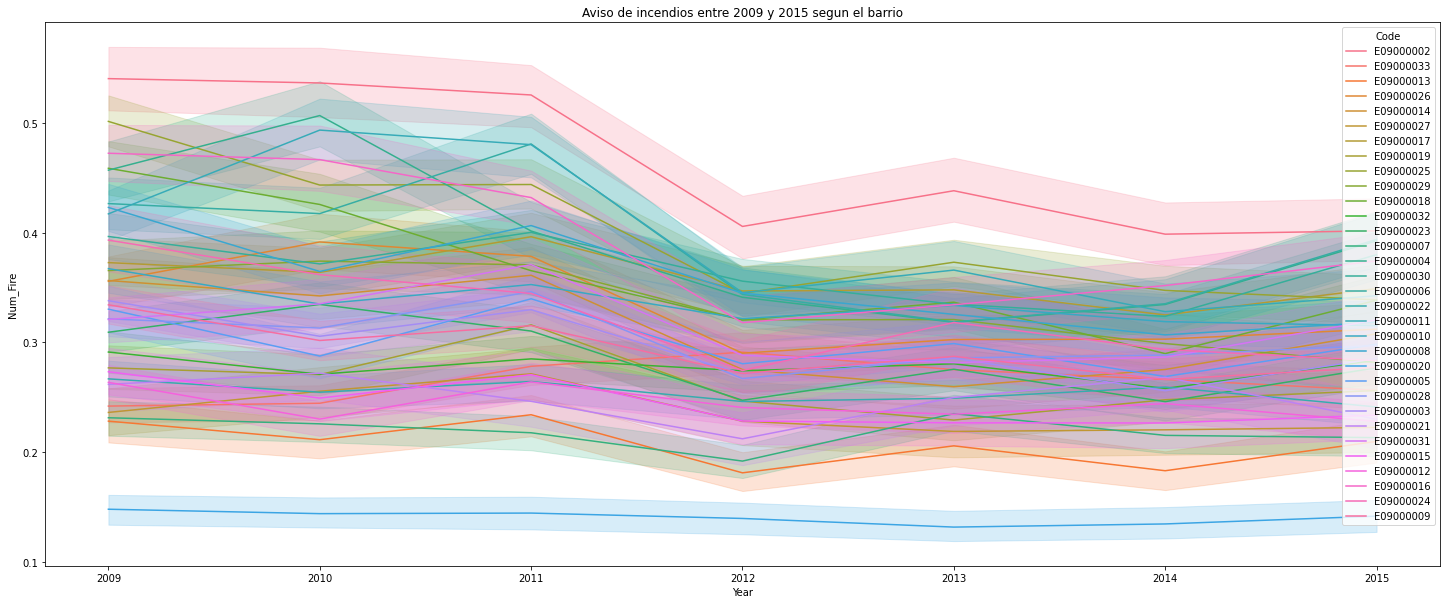

In [32]:
a4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Aviso de incendios entre 2009 y 2015 segun el barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Fire", hue="Code",ax=ax)


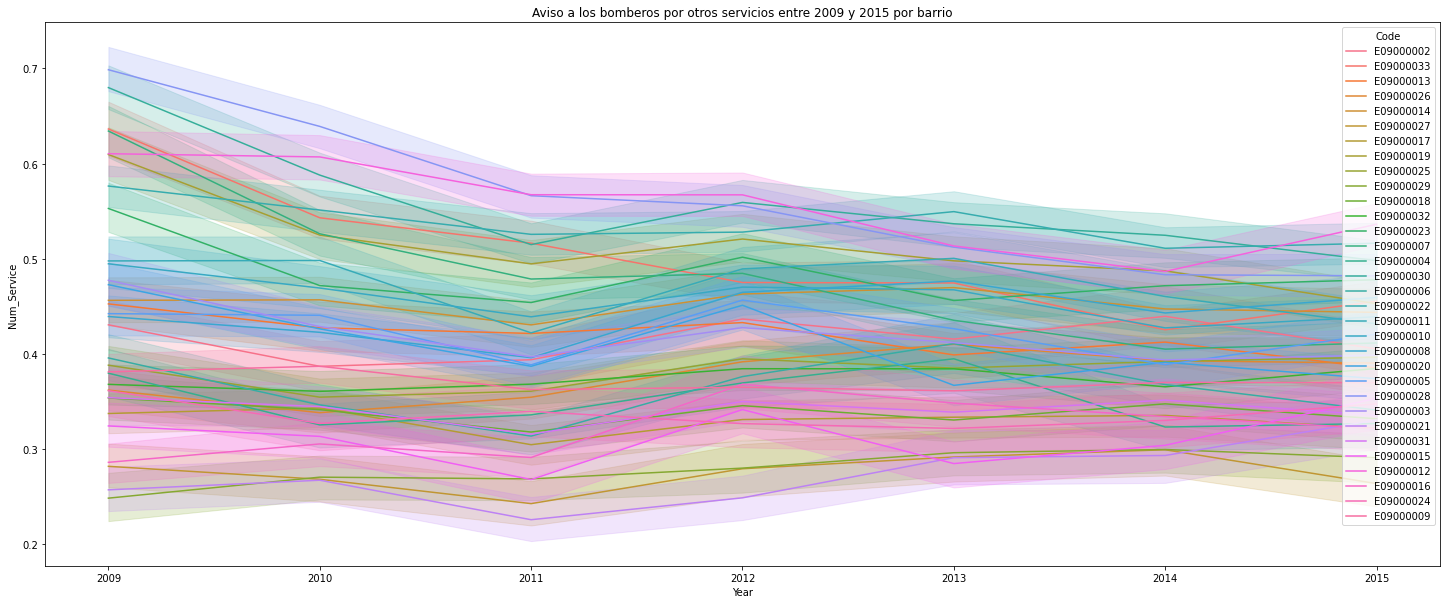

In [33]:
fa4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Aviso a los bomberos por otros servicios entre 2009 y 2015 por barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Service", hue="Code",ax=ax)

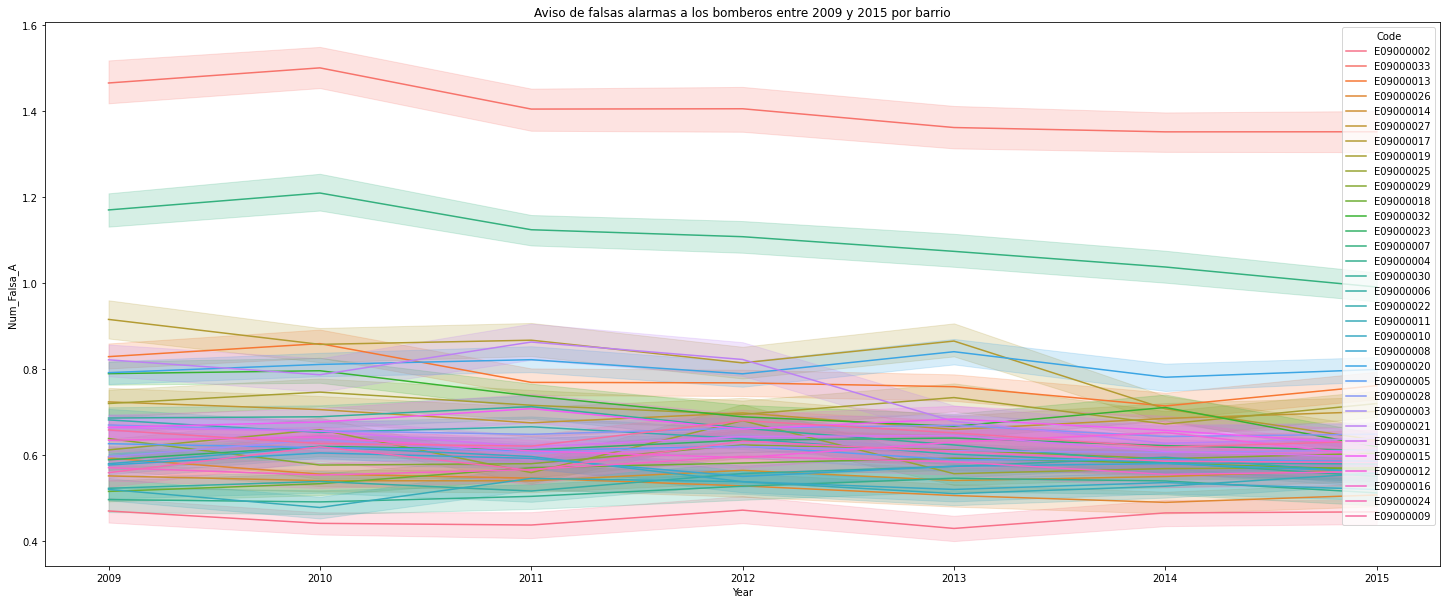

In [34]:
fa4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Aviso de falsas alarmas a los bomberos entre 2009 y 2015 por barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Falsa_A", hue="Code",ax=ax)

## DATASET PRECIO VIVIENDA POR GANACIAS


In [35]:
viviendas = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/ratio-house-price-earnings-residence-based.xlsx')
viviendas.head()


New Code Old Code                  Area  2002  ...   2017   2018   2019   2020
0        NaN      NaN                   NaN   NaN  ...    NaN    NaN    NaN    NaN
1  E09000001     00AA        City of London  6.29  ...      :  16.55      :      :
2  E09000002     00AB  Barking and Dagenham  4.68  ...     10  10.40  10.75   9.63
3  E09000003     00AC                Barnet  7.42  ...   13.7  14.45  14.19  15.93
4  E09000004     00AD                Bexley  5.56  ...  10.01  10.04   9.61   9.28

[5 rows x 22 columns]

###ANALISIS DE DATOS

In [36]:
#descripcionDatosDataset(viviendas)

###LIMPIEZA

In [37]:
viviendas["Code_true"]= viviendas["New Code"].str.contains('E09', na=False)
viviendas=viviendas.loc[(viviendas["Code_true"]==True)]
viviendas.drop("Code_true", inplace=True, axis=1)
viviendas

New Code Old Code                    Area  ...   2018   2019   2020
1   E09000001     00AA          City of London  ...  16.55      :      :
2   E09000002     00AB    Barking and Dagenham  ...  10.40  10.75   9.63
3   E09000003     00AC                  Barnet  ...  14.45  14.19  15.93
4   E09000004     00AD                  Bexley  ...  10.04   9.61   9.28
5   E09000005     00AE                   Brent  ...  16.32  15.59  14.49
6   E09000006     00AF                 Bromley  ...  11.00  10.73  10.55
7   E09000007     00AG                  Camden  ...  18.23  18.27  18.81
8   E09000008     00AH                 Croydon  ...  10.46  10.97  10.41
9   E09000009     00AJ                  Ealing  ...  14.16  14.79   13.2
10  E09000010     00AK                 Enfield  ...  12.94  12.34  12.51
11  E09000011     00AL               Greenwich  ...  11.95  12.72     12
12  E09000012     00AM                 Hackney  ...  16.34  16.04  16.66
13  E09000013     00AN  Hammersmith and Fulham  ...  20.04  17.34  18.54
14  E09000014     00AP                Haringey  ...  15.66   14.4  14.58
15  E09000015     00AQ                  Harrow  ...  13.59  13.02  12.48
16  E09000016     00AR                Havering  ...  10.54  10.77  10.65
17  E09000017     00AS              Hillingdon  ...  13.56  13.15  12.28
18  E09000018     00AT                Hounslow  ...  12.75  11.82  12.31
19  E09000019     00AU               Islington  ...  13.10  13.73  13.79
20  E09000020     00AW  Kensington and Chelsea  ...  33.43  27.64  27.16
21  E09000021     00AX    Kingston upon Thames  ...  12.74  12.71  11.92
22  E09000022     00AY                 Lambeth  ...  13.82   14.4   13.1
23  E09000023     00AZ                Lewisham  ...  12.20  12.74  11.55
24  E09000024     00BA                  Merton  ...  12.91   12.4  11.53
25  E09000025     00BB                  Newham  ...  13.28  12.98  12.14
26  E09000026     00BC               Redbridge  ...  12.79  12.02  11.63
27  E09000027     00BD    Richmond upon Thames  ...  14.88  14.74   13.5
28  E09000028     00BE               Southwark  ...  15.35  14.31  13.83
29  E09000029     00BF                  Sutton  ...  10.77   10.4  11.56
30  E09000030     00BG           Tower Hamlets  ...  12.73   11.5  12.12
31  E09000031     00BH          Waltham Forest  ...  13.55  12.66  12.37
32  E09000032     00BJ              Wandsworth  ...  14.80  14.38  14.39
33  E09000033     00BK             Westminster  ...  23.66   21.6  22.41

[33 rows x 22 columns]

###TRANSFORMACION

Realizamos las transformaciones necesarias para poder unirlo

In [38]:
#Transformacion de dataset para poder unirlo al principal
viv=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda', "Year"])
viviendas_tr=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda',"Year"])
for i in range(1,33):
  viv["Ingreso_Vivienda"]=viviendas.iloc[i,3:22]
  viv["Code"]=viviendas.iloc[i,0]
  viv["Year"]=viviendas.columns[3:22]
  viviendas_tr=pd.concat([viviendas_tr,viv])
viviendas_tr

Code Ingreso_Vivienda  Year
2002  E09000002             4.68  2002
2003  E09000002             6.26  2003
2004  E09000002             7.18  2004
2005  E09000002             7.15  2005
2006  E09000002             6.55  2006
...         ...              ...   ...
2016  E09000033            23.48  2016
2017  E09000033            24.36  2017
2018  E09000033            23.66  2018
2019  E09000033             21.6  2019
2020  E09000033            22.41  2020

[608 rows x 3 columns]

In [39]:
viviendas_tr["Code"]=viviendas_tr["Code"].astype("string")
viviendas_tr["Year"]=viviendas_tr["Year"].astype(int)
viviendas_tr["Ingreso_Vivienda"]=viviendas_tr["Ingreso_Vivienda"].astype(int)

In [40]:
viviendas_tr= viviendas_tr.loc[(viviendas_tr["Year"]>=2009)&(viviendas_tr["Year"]<=2015)]

###VISUALIZACION

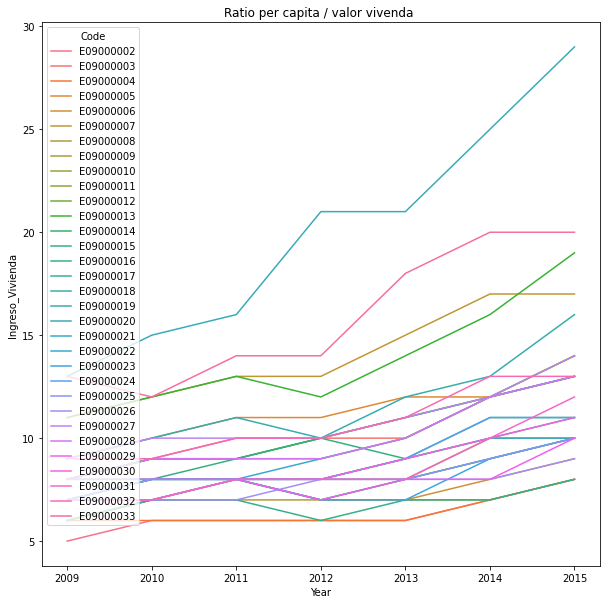

In [41]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Ratio per capita / valor vivenda ")
sns.lineplot(data=viviendas_tr, x="Year", y="Ingreso_Vivienda", hue="Code",ax=ax)


##DATASET DENSIDAD POBLACION

In [42]:
densidad = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/housing-density-borough.csv')
densidad

Code  ... Population_per_square_kilometre
0     E09000001  ...                          2266.2
1     E09000001  ...                          2415.3
2     E09000001  ...                          2534.1
3     E09000001  ...                          2506.9
4     E09000001  ...                          2450.1
...         ...  ...                             ...
1867  E13000002  ...                          5240.8
1868  E13000002  ...                          5261.2
1869  E13000002  ...                          5280.4
1870  E13000002  ...                          5300.1
1871  E13000002  ...                          5319.0

[1872 rows x 10 columns]

###ANALISIS DE DATOS

In [43]:
descripcionDatosDataset(densidad)

Cantidad de filas: 1872
Cantidad de columnas: 10
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Name
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       1999.000000
max       2050.000000
mean      2024.500000
std         15.012341


###LIMPIEZA

In [44]:
col_eliminar_densidad=["Name","Source","Inland_Area _Hectares", "Total_Area_Hectares", "Population_per_hectare", "Population_per_square_kilometre"]
densidad.drop(col_eliminar_densidad, inplace=True, axis=1)
densidad

Code  Year  Population  Square_Kilometres
0     E09000001  1999        6581                2.9
1     E09000001  2000        7014                2.9
2     E09000001  2001        7359                2.9
3     E09000001  2002        7280                2.9
4     E09000001  2003        7115                2.9
...         ...   ...         ...                ...
1867  E13000002  2046     6573194             1254.2
1868  E13000002  2047     6598789             1254.2
1869  E13000002  2048     6622921             1254.2
1870  E13000002  2049     6647527             1254.2
1871  E13000002  2050     6671295             1254.2

[1872 rows x 4 columns]

In [45]:
densidad["Code"]=densidad["Code"].astype("string")
densidad["Year"]=densidad["Year"].astype(int)
densidad["Population"]=densidad["Population"].astype(int)
densidad["Square_Kilometres"]=densidad["Square_Kilometres"].astype(int)
densidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               1872 non-null   string
 1   Year               1872 non-null   int64 
 2   Population         1872 non-null   int64 
 3   Square_Kilometres  1872 non-null   int64 
dtypes: int64(3), string(1)
memory usage: 58.6 KB


In [46]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
densidad=densidad.rename(columns={"Population":"Poblacion", "Square_Kilometres":"Area_m2"})
densidad

Code  Year  Poblacion  Area_m2
0     E09000001  1999       6581        2
1     E09000001  2000       7014        2
2     E09000001  2001       7359        2
3     E09000001  2002       7280        2
4     E09000001  2003       7115        2
...         ...   ...        ...      ...
1867  E13000002  2046    6573194     1254
1868  E13000002  2047    6598789     1254
1869  E13000002  2048    6622921     1254
1870  E13000002  2049    6647527     1254
1871  E13000002  2050    6671295     1254

[1872 rows x 4 columns]

In [47]:
#Atributo code
densidad["Code"].unique()   

<StringArray>
['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033', 'E12000007', 'E13000001', 'E13000002']
Length: 36, dtype: string

In [48]:
densidad["Code_true"]= densidad["Code"].str.contains('E09', na=False)
densidad=densidad.loc[(densidad["Code_true"]==True)]
densidad.drop("Code_true", inplace=True, axis=1)
densidad["Code"].unique() 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<StringArray>
['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [49]:
densidad=densidad.loc[(densidad["Code"]!="E09000001")]

In [50]:
densidad["Year"].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [51]:
densidad=densidad.loc[(densidad["Year"]<=2015)&(densidad["Year"]>=2009)]


###VISUALIZACION

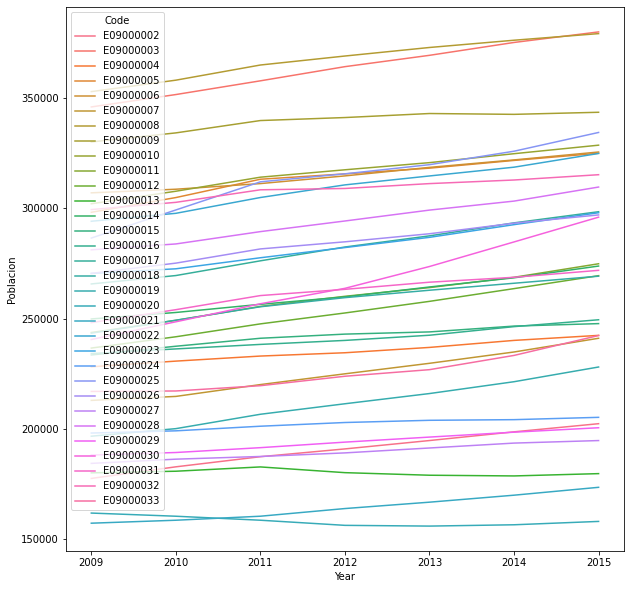

In [52]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=densidad, x="Year", y="Poblacion", hue="Code",ax=ax)

##DATASET CRIMENES

In [53]:
crimenes = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/crime-rates.csv')
crimenes

Code               Borough  ...   Rate Number_of_offences
0     E09000002  Barking and Dagenham  ...  120.5             19,567
1     E09000003                Barnet  ...   98.0             30,708
2     E09000004                Bexley  ...   95.1             20,680
3     E09000005                 Brent  ...  127.7             33,253
4     E09000006               Bromley  ...   89.8             26,474
...         ...                   ...  ...    ...                ...
6655        NaN              Heathrow  ...    NaN              1,081
6656  E13000001          Inner London  ...    1.7              6,041
6657  E13000002          Outer London  ...    1.3              6,637
6658  E12000007       Met Police Area  ...    1.6             13,759
6659        727     England and Wales  ...    NaN                NaN

[6660 rows x 6 columns]

In [54]:
crimenes["Offences"].unique()

array(['All recorded offences', 'Violence Against the Person',
       'Sexual Offences', 'Robbery', 'Burglary', 'Theft and Handling',
       'Fraud or Forgery', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences'], dtype=object)

###ANALISIS DE DATOS

In [55]:
descripcionDatosDataset(crimenes)

Cantidad de filas: 6660
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000008' 'E09000009' 'E09000010' 'E09000011']
-- Cantidad de nulos: 180 = 2.70%
----------------------------------------------------------------------------------------------------
Columna: Borough
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['1999-00' '2000-01' '2001-02' '2002-03' '2003-04' '20

###LIMPIEZA

In [56]:
crimenes["Number_of_offences"]=crimenes["Number_of_offences"].str.replace(",","")

In [57]:
col_eliminar_crimenes=["Borough", "Rate"]
crimenes.drop(col_eliminar_crimenes, inplace=True, axis=1)
crimenes

Code     Year                   Offences Number_of_offences
0     E09000002  1999-00      All recorded offences              19567
1     E09000003  1999-00      All recorded offences              30708
2     E09000004  1999-00      All recorded offences              20680
3     E09000005  1999-00      All recorded offences              33253
4     E09000006  1999-00      All recorded offences              26474
...         ...      ...                        ...                ...
6655        NaN  2016-17  Other Notifiable Offences               1081
6656  E13000001  2016-17  Other Notifiable Offences               6041
6657  E13000002  2016-17  Other Notifiable Offences               6637
6658  E12000007  2016-17  Other Notifiable Offences              13759
6659        727  2016-17  Other Notifiable Offences                NaN

[6660 rows x 4 columns]

In [58]:
#Creamos un dataset por cada tipo de crimen
#Violencia
crimenes_violence=crimenes.loc[crimenes["Offences"]=="Violence Against the Person"]
crimenes_violence=crimenes_violence.rename(columns={"Number_of_offences": "Crim_Violencia"})
crimenes_violence.drop("Offences", inplace=True, axis=1)

#Sexual
crimenes_sexual=crimenes.loc[crimenes["Offences"]=="Sexual Offences"]
crimenes_sexual=crimenes_sexual.rename(columns={"Number_of_offences": "Crim_Sexual"})
crimenes_sexual.drop("Offences", inplace=True, axis=1)

#Robos
crimenes_robbery=crimenes.loc[crimenes["Offences"]=="Robbery"]
crimenes_robbery=crimenes_robbery.rename(columns={"Number_of_offences": "Crim_Robos"})
crimenes_robbery.drop("Offences", inplace=True, axis=1)

#Robos en casas
crimenes_burglary=crimenes.loc[crimenes["Offences"]=="Burglary"]
crimenes_burglary=crimenes_burglary.rename(columns={"Number_of_offences": "Crim_Robos_casas"})
crimenes_burglary.drop("Offences", inplace=True, axis=1)

#ladrones
crimenes_theft=crimenes.loc[crimenes["Offences"]=="Theft and Handling"]
crimenes_theft=crimenes_theft.rename(columns={"Number_of_offences": "Crim_ladrones"})
crimenes_theft.drop("Offences", inplace=True, axis=1)

#Fraudes
crimenes_fraud=crimenes.loc[crimenes["Offences"]=="Fraud or Forgery"]
crimenes_fraud=crimenes_fraud.rename(columns={"Number_of_offences": "Crim_Fraude"})
crimenes_fraud.drop("Offences", inplace=True, axis=1)

#Danyos
crimenes_damage=crimenes.loc[crimenes["Offences"]=="Criminal Damage"]
crimenes_damage=crimenes_damage.rename(columns={"Number_of_offences": "Crim_Danyo"})
crimenes_damage.drop("Offences", inplace=True, axis=1)

#Drogas
crimenes_drugs=crimenes.loc[crimenes["Offences"]=="Drugs"]
crimenes_drugs=crimenes_drugs.rename(columns={"Number_of_offences": "Crim_Drogas"})
crimenes_drugs.drop("Offences", inplace=True, axis=1)

#Otros
crimenes_other=crimenes.loc[crimenes["Offences"]=="Other Notifiable Offences"]
crimenes_other=crimenes_other.rename(columns={"Number_of_offences": "Crim_Otros"})
crimenes_other.drop("Offences", inplace=True, axis=1)


###UNION DATASET CRIMENES

In [59]:
dfs = [crimenes_violence,crimenes_sexual,crimenes_robbery, crimenes_burglary,crimenes_theft,crimenes_fraud,crimenes_damage,crimenes_drugs,crimenes_other]
crimenes_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)
crimenes_total

Code     Year Crim_Violencia  ... Crim_Danyo Crim_Drogas Crim_Otros
0    E09000002  1999-00           3210  ...       3666         444        167
1    E09000003  1999-00           4244  ...       5110         494        273
2    E09000004  1999-00           3151  ...       4390         375        184
3    E09000005  1999-00           5407  ...       4272         969        354
4    E09000006  1999-00           3224  ...       5283         525        214
..         ...      ...            ...  ...        ...         ...        ...
661        NaN  2016-17            269  ...         57          66       1081
662  E13000001  2016-17          93353  ...      23094       17221       6041
663  E13000002  2016-17         104389  ...      31112       13881       6637
664  E12000007  2016-17         198011  ...      54263       31168      13759
665        727  2016-17            NaN  ...        NaN         NaN        NaN

[666 rows x 11 columns]

In [60]:
crimenes_total=crimenes_total.loc[(crimenes_total["Code"]!="E09000001")]
crimenes_total["Code"].unique()

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033', nan, 'E13000001', 'E13000002',
       'E12000007', '727'], dtype=object)

In [61]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)
crimenes_total["Code"].unique() 

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033'], dtype=object)

In [62]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
crimenes_total["Year"]=crimenes_total["Year"].map(lambda x: str(x)[:-3])
crimenes_total["Year"]

0      1999
1      1999
2      1999
3      1999
4      1999
       ... 
656    2016
657    2016
658    2016
659    2016
660    2016
Name: Year, Length: 576, dtype: object

In [63]:
crimenes_total["Year"]=crimenes_total["Year"].astype(int)
crimenes_total=crimenes_total.loc[(crimenes_total["Year"]<=2015) & (crimenes_total["Year"]>=2009)]

In [64]:
crimenes_total["Code"]=crimenes_total["Code"].astype("string")
crimenes_total["Crim_Violencia"]=crimenes_total["Crim_Violencia"].astype(int)
crimenes_total["Crim_Sexual"]=crimenes_total["Crim_Sexual"].astype(int)
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
crimenes_total["Crim_ladrones"]=crimenes_total["Crim_ladrones"].astype(int)
crimenes_total["Crim_Robos_casas"]=crimenes_total["Crim_Robos_casas"].astype(int)
crimenes_total["Crim_Fraude"]=crimenes_total["Crim_Fraude"].astype(int)
crimenes_total["Crim_Danyo"]=crimenes_total["Crim_Danyo"].astype(int)
crimenes_total["Crim_Drogas"]=crimenes_total["Crim_Drogas"].astype(int)
crimenes_total["Crim_Otros"]=crimenes_total["Crim_Otros"].astype(int)
crimenes_total.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 370 to 623
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Code              224 non-null    string
 1   Year              224 non-null    int64 
 2   Crim_Violencia    224 non-null    int64 
 3   Crim_Sexual       224 non-null    int64 
 4   Crim_Robos        224 non-null    int64 
 5   Crim_Robos_casas  224 non-null    int64 
 6   Crim_ladrones     224 non-null    int64 
 7   Crim_Fraude       224 non-null    int64 
 8   Crim_Danyo        224 non-null    int64 
 9   Crim_Drogas       224 non-null    int64 
 10  Crim_Otros        224 non-null    int64 
dtypes: int64(10), string(1)
memory usage: 21.0 KB


In [65]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)
crimenes_total["Code"].unique()   

<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033']
Length: 32, dtype: string

###VISUALIZACION

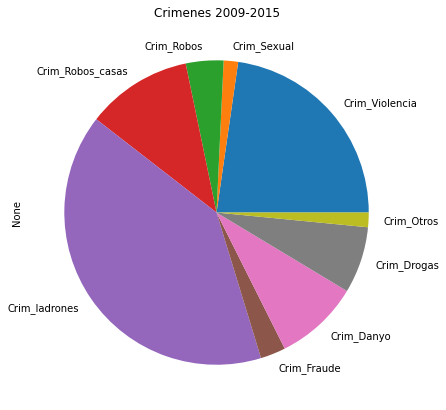

In [66]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
crimenes_total[crimenes_total.columns[2:]].sum().plot.pie(ax=ax, title="Crimenes 2009-2015")

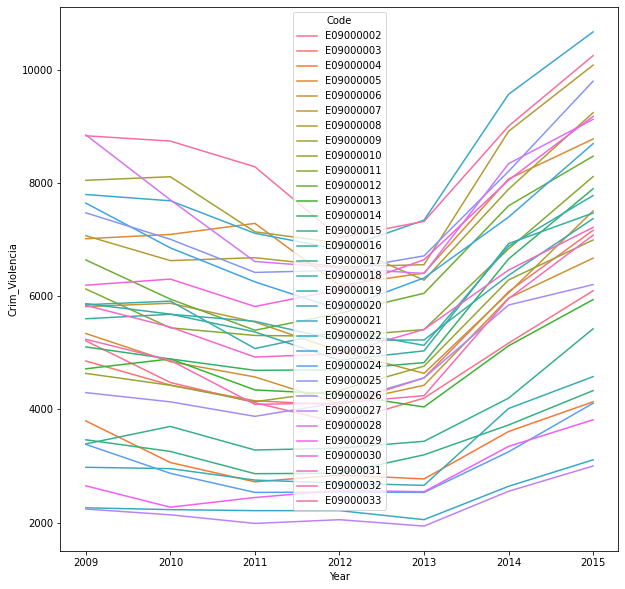

In [67]:
a4_dims = (10, 10)
crimenes_total["Crim_Violencia"]=crimenes_total["Crim_Violencia"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Violencia", hue="Code",ax=ax)

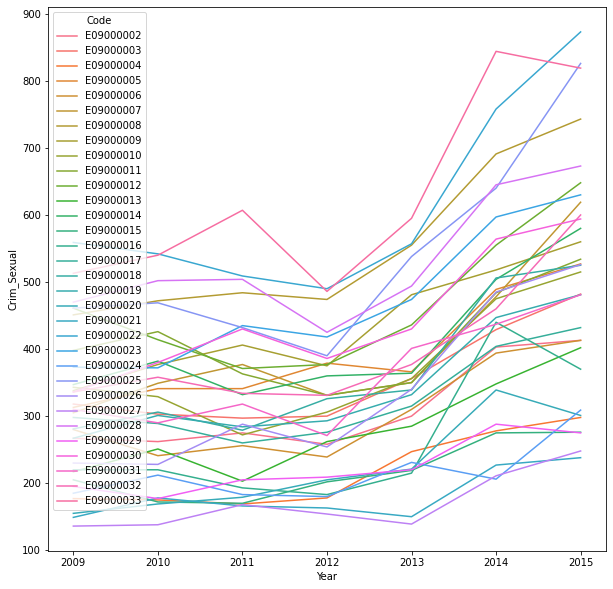

In [68]:
crimenes_total["Crim_Sexual"]=crimenes_total["Crim_Sexual"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Sexual", hue="Code",ax=ax)

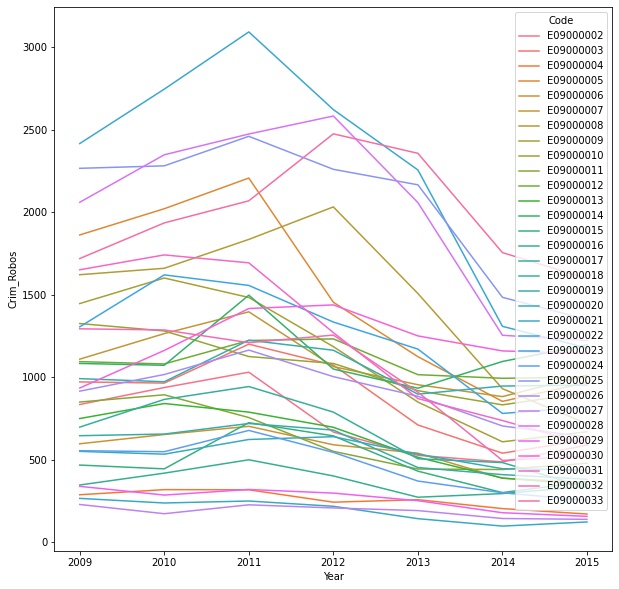

In [69]:
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos", hue="Code",ax=ax)

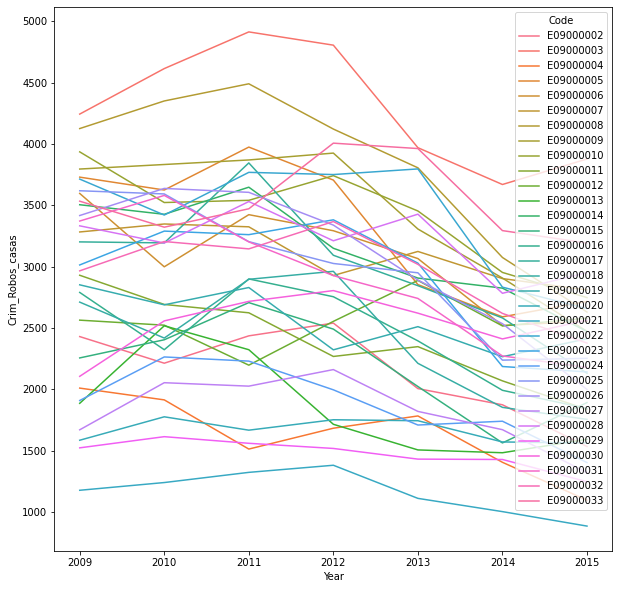

In [70]:
crimenes_total["Crim_Robos_casas"]=crimenes_total["Crim_Robos_casas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos_casas", hue="Code",ax=ax)

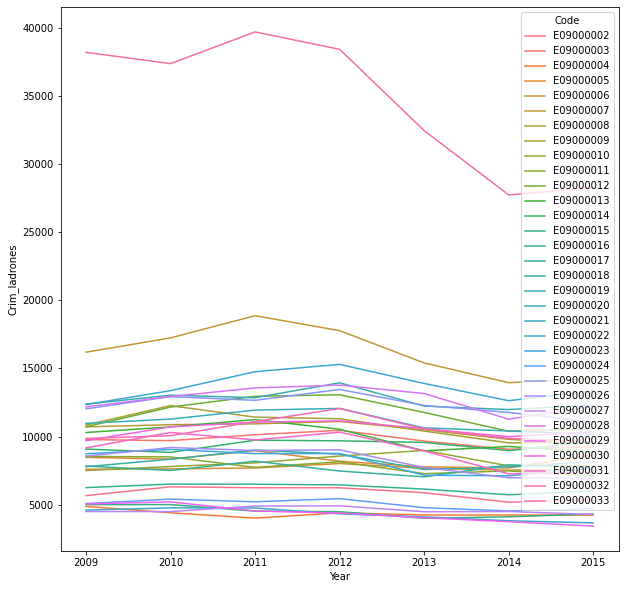

In [71]:
crimenes_total["Crim_ladrones"]=crimenes_total["Crim_ladrones"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_ladrones", hue="Code",ax=ax)

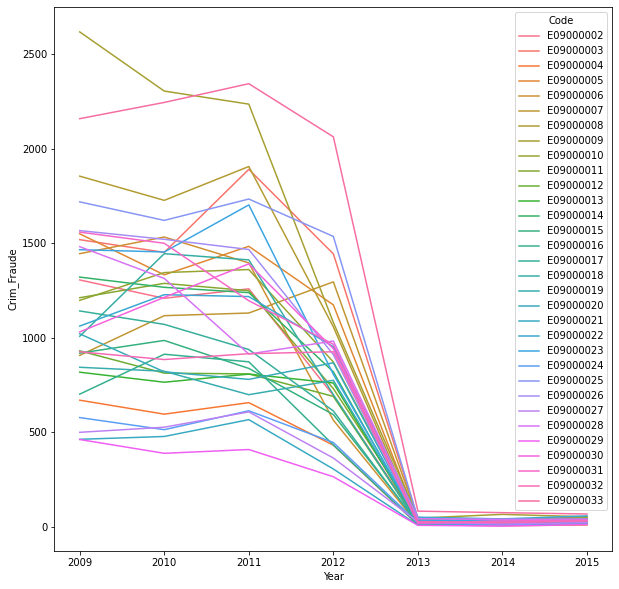

In [72]:
crimenes_total["Crim_Fraude"]=crimenes_total["Crim_Fraude"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Fraude", hue="Code",ax=ax)

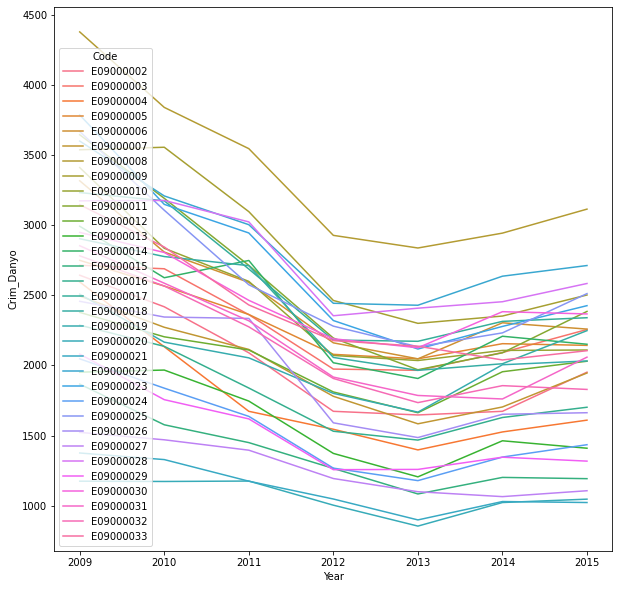

In [73]:
crimenes_total["Crim_Danyo"]=crimenes_total["Crim_Danyo"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Danyo", hue="Code",ax=ax)

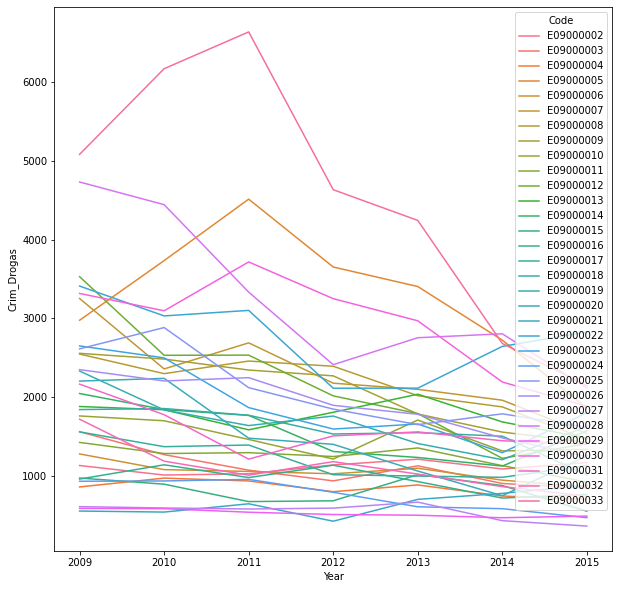

In [74]:
crimenes_total["Crim_Drogas"]=crimenes_total["Crim_Drogas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Drogas", hue="Code",ax=ax)

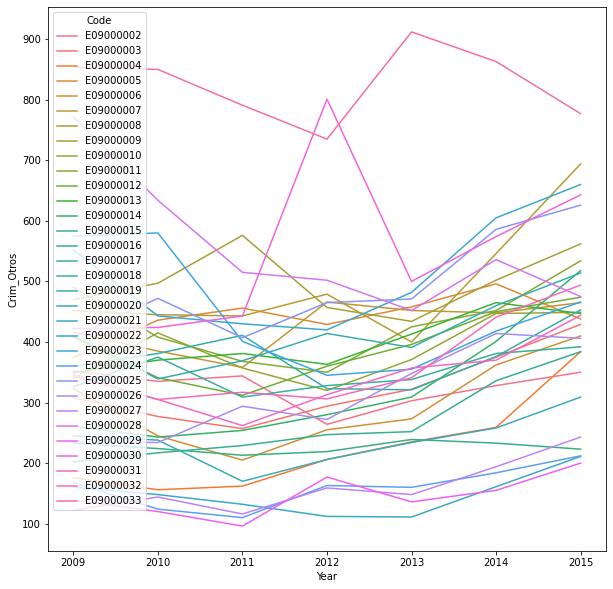

In [75]:
crimenes_total["Crim_Otros"]=crimenes_total["Crim_Otros"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Otros", hue="Code",ax=ax)

##DATASET PRECIO VIVIENDA

In [76]:
p_vivienda = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/land-registry-house-prices-borough.csv')
p_vivienda

Code                  Area                  Year Measure    Value
0      E09000001        City of London  Year ending Dec 1995  Median  105,000
1      E09000002  Barking and Dagenham  Year ending Dec 1995  Median   49,000
2      E09000003                Barnet  Year ending Dec 1995  Median   85,125
3      E09000004                Bexley  Year ending Dec 1995  Median   62,000
4      E09000005                 Brent  Year ending Dec 1995  Median   68,000
...          ...                   ...                   ...     ...      ...
12010  E12000008            South East  Year ending Dec 2017   Sales  148,025
12011  E12000009            South West  Year ending Dec 2017   Sales  102,292
12012  E92000001               England  Year ending Dec 2017   Sales  837,501
12013  W92000076                 Wales  Year ending Dec 2017   Sales   46,828
12014  K04000073     England And Wales  Year ending Dec 2017   Sales  884,329

[12015 rows x 5 columns]

###ANALISIS DE DATOS

In [77]:
descripcionDatosDataset(p_vivienda)

Cantidad de filas: 12015
Cantidad de columnas: 5
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Year ending Dec 1995' 'Year ending Mar 1996' 'Year 

###LIMPIEZA

In [78]:
#Nos quedamos con las ventas
p_vivienda=p_vivienda.loc[p_vivienda["Measure"]=="Median"]
p_vivienda

Code                  Area                  Year Measure    Value
0     E09000001        City of London  Year ending Dec 1995  Median  105,000
1     E09000002  Barking and Dagenham  Year ending Dec 1995  Median   49,000
2     E09000003                Barnet  Year ending Dec 1995  Median   85,125
3     E09000004                Bexley  Year ending Dec 1995  Median   62,000
4     E09000005                 Brent  Year ending Dec 1995  Median   68,000
...         ...                   ...                   ...     ...      ...
4000  E12000008            South East  Year ending Dec 2017  Median  315,000
4001  E12000009            South West  Year ending Dec 2017  Median  242,500
4002  E92000001               England  Year ending Dec 2017  Median  234,000
4003  W92000076                 Wales  Year ending Dec 2017  Median  151,000
4004  K04000073     England And Wales  Year ending Dec 2017  Median  227,722

[4005 rows x 5 columns]

In [79]:
col_eliminar_vivienda=["Area", "Measure"]
p_vivienda.drop(col_eliminar_vivienda, inplace=True, axis=1)
p_vivienda

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Code                  Year    Value
0     E09000001  Year ending Dec 1995  105,000
1     E09000002  Year ending Dec 1995   49,000
2     E09000003  Year ending Dec 1995   85,125
3     E09000004  Year ending Dec 1995   62,000
4     E09000005  Year ending Dec 1995   68,000
...         ...                   ...      ...
4000  E12000008  Year ending Dec 2017  315,000
4001  E12000009  Year ending Dec 2017  242,500
4002  E92000001  Year ending Dec 2017  234,000
4003  W92000076  Year ending Dec 2017  151,000
4004  K04000073  Year ending Dec 2017  227,722

[4005 rows x 3 columns]

In [80]:
p_vivienda["Year"].unique()

array(['Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996',
       'Year ending Dec 1996', 'Year ending Mar 1997',
       'Year ending Jun 1997', 'Year ending Sep 1997',
       'Year ending Dec 1997', 'Year ending Mar 1998',
       'Year ending Jun 1998', 'Year ending Sep 1998',
       'Year ending Dec 1998', 'Year ending Mar 1999',
       'Year ending Jun 1999', 'Year ending Sep 1999',
       'Year ending Dec 1999', 'Year ending Mar 2000',
       'Year ending Jun 2000', 'Year ending Sep 2000',
       'Year ending Dec 2000', 'Year ending Mar 2001',
       'Year ending Jun 2001', 'Year ending Sep 2001',
       'Year ending Dec 2001', 'Year ending Mar 2002',
       'Year ending Jun 2002', 'Year ending Sep 2002',
       'Year ending Dec 2002', 'Year ending Mar 2003',
       'Year ending Jun 2003', 'Year ending Sep 2003',
       'Year ending Dec 2003', 'Year ending Mar 2004',
       'Year ending Jun 2004', 'Year ending Sep 2004',
       'Ye

In [81]:
p_vivienda["Year_true"]= p_vivienda["Year"].str.contains('Year ending Dec', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Year_true"]==True)]
p_vivienda.drop("Year_true", inplace=True, axis=1)
p_vivienda["Year"].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['Year ending Dec 1995', 'Year ending Dec 1996',
       'Year ending Dec 1997', 'Year ending Dec 1998',
       'Year ending Dec 1999', 'Year ending Dec 2000',
       'Year ending Dec 2001', 'Year ending Dec 2002',
       'Year ending Dec 2003', 'Year ending Dec 2004',
       'Year ending Dec 2005', 'Year ending Dec 2006',
       'Year ending Dec 2007', 'Year ending Dec 2008',
       'Year ending Dec 2009', 'Year ending Dec 2010',
       'Year ending Dec 2011', 'Year ending Dec 2012',
       'Year ending Dec 2013', 'Year ending Dec 2014',
       'Year ending Dec 2015', 'Year ending Dec 2016',
       'Year ending Dec 2017'], dtype=object)

In [82]:
#Transformamos la columna anyo para poder unir el dataset al resto
p_vivienda["Year"]=p_vivienda["Year"].map(lambda x: str(x)[16:])
p_vivienda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Code  Year    Value
0     E09000001  1995  105,000
1     E09000002  1995   49,000
2     E09000003  1995   85,125
3     E09000004  1995   62,000
4     E09000005  1995   68,000
...         ...   ...      ...
4000  E12000008  2017  315,000
4001  E12000009  2017  242,500
4002  E92000001  2017  234,000
4003  W92000076  2017  151,000
4004  K04000073  2017  227,722

[1035 rows x 3 columns]

In [83]:
p_vivienda["Value"]=p_vivienda["Value"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
p_vivienda["Code"]=p_vivienda["Code"].astype("string")
p_vivienda["Year"]=p_vivienda["Year"].astype(int)
p_vivienda["Value"]=p_vivienda["Value"].astype(int)
p_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 4004
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    1035 non-null   string
 1   Year    1035 non-null   int64 
 2   Value   1035 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 32.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [85]:
p_vivienda=p_vivienda.loc[(p_vivienda["Code"]!="E09000001")]
p_vivienda["Code"].unique()

<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033', 'E12000001', 'E12000002', 'E12000003', 'E12000004',
 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E92000001',
 'W92000004', 'K04000001', 'W92000008', 'K04000005', 'W92000012', 'K04000009',
 'W92000016', 'K04000013', 'W92000020', 'K04000017', 'W92000024', 'K04000021',
 'W92000028', 'K04000025', 'W92000032', 'K04000029', 'W92000036', 'K04000033',
 'W92000040', 'K04000037', 'W92000044', 'K04000041', 'W92000048', 'K04000045',
 'W92000052', 'K04000049', 'W92000056', 'K04000053', 'W92000060', 'K04000057',
 'W92000064', 'K04000061', 'W92000068'

In [86]:
p_vivienda["Code_true"]= p_vivienda["Code"].str.contains('E09', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Code_true"]==True)]
p_vivienda.drop("Code_true", inplace=True, axis=1)
p_vivienda["Code"].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033']
Length: 32, dtype: string

In [87]:
p_vivienda=p_vivienda.rename(columns={"Value":"Precio_Vivienda"})

In [88]:
p_vivienda["Precio_Vivienda"]=p_vivienda["Precio_Vivienda"].astype(int)
p_vivienda["Year"]=p_vivienda["Year"].astype(int)

In [89]:
p_vivienda=p_vivienda.loc[(p_vivienda["Year"]<=2015) & (p_vivienda["Year"]>=2009)]

In [90]:
p_vivienda.loc[(p_vivienda["Year"]==2015) & (p_vivienda["Code"]=="E09000001")]

Empty DataFrame
Columns: [Code, Year, Precio_Vivienda]
Index: []

###VISUALIZACION

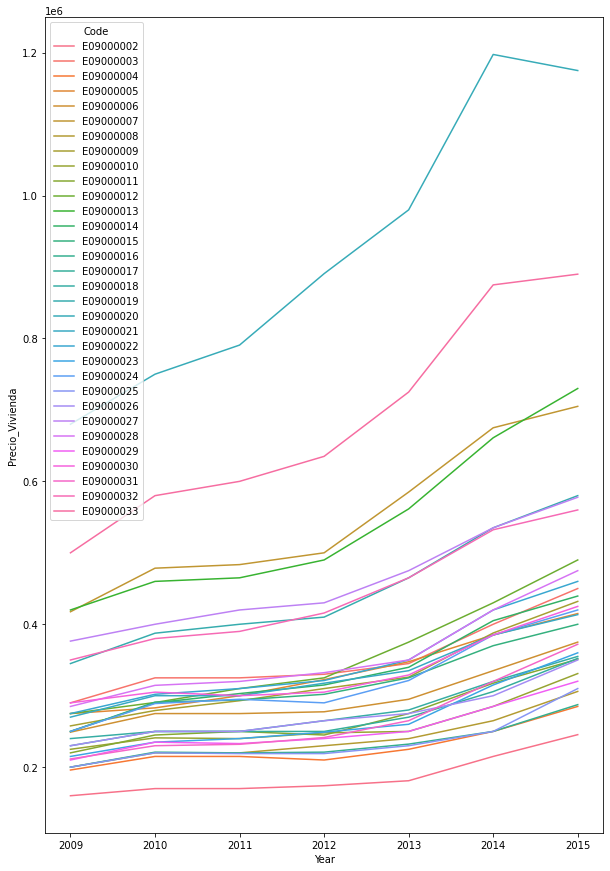

In [91]:
a4_dims = (10, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=p_vivienda, x="Year", y="Precio_Vivienda", hue="Code",ax=ax)

##DATASET CONSUMO ENERGETICO

In [92]:
consumo = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/total-final-energy-consumption.xlsx')
consumo

Code                  Area  ...  Measurement       Value
0      E09000002  Barking and Dagenham  ...         Ktoe           0
1      E09000003                Barnet  ...         Ktoe           0
2      E09000004                Bexley  ...         Ktoe  0.00819482
3      E09000005                 Brent  ...         Ktoe           0
4      E09000006               Bromley  ...         Ktoe  0.00201073
...          ...                   ...  ...          ...         ...
23777  N92000002      Northern Ireland  ...          GWh           0
23778  W92000004                 Wales  ...          GWh           0
23779  S92000003              Scotland  ...          GWh           0
23780  E92000001               England  ...          GWh           0
23781  K02000001        United Kingdom  ...          GWh           0

[23782 rows x 7 columns]

###ANALISIS DE DATOS

In [93]:
descripcionDatosDataset(consumo)

Cantidad de filas: 23782
Cantidad de columnas: 7
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000001' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       2005.000000
max       2015.000000
mean      2010.000000
std          3.162344


###LIMPIEZA

In [94]:
#Borramos las columnas que no necesitamos
consumo=consumo.loc[consumo["Measurement"]=="GWh"]
col_eliminar_consumo=["Area", "Measurement"]
consumo.drop(col_eliminar_consumo, inplace=True, axis=1)
consumo=consumo.astype("string")
#consumo=consumo(["Code","Year", "Fuel"], dtype="string")
consumo

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Code  Year              Fuel                   Sector        Value
11891  E09000002  2005              Coal  Industrial & Commercial            0
11892  E09000003  2005              Coal  Industrial & Commercial            0
11893  E09000004  2005              Coal  Industrial & Commercial  0.095305777
11894  E09000005  2005              Coal  Industrial & Commercial            0
11895  E09000006  2005              Coal  Industrial & Commercial  0.023384762
...          ...   ...               ...                      ...          ...
23777  N92000002  2015  Consuming Sector                Transport            0
23778  W92000004  2015  Consuming Sector                Transport            0
23779  S92000003  2015  Consuming Sector                Transport            0
23780  E92000001  2015  Consuming Sector                Transport            0
23781  K02000001  2015  Consuming Sector                Transport            0

[11891 rows x 5 columns]

In [95]:
consumo=consumo.loc[(consumo["Sector"]=="Total")]
consumo.drop("Sector", inplace=True, axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
consumo["Code_true"]= consumo["Code"].str.contains('E09', na=False)
consumo=consumo.loc[(consumo["Code_true"]==True)]
consumo.drop("Code_true", inplace=True, axis=1)
consumo["Code"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000001', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [97]:
consumo=consumo.loc[(consumo["Code"]!="E09000001")]

In [98]:
consumo= consumo.loc[(consumo["Year"]>="2009")&(consumo["Year"]<="2015")]

In [99]:
#Creamos un dataset por cada tipo de energia consumida
consumo_coal=consumo.loc[consumo["Fuel"]=="Coal"]
consumo_coal=consumo_coal.rename(columns={"Value": "Coal"})
consumo_coal.drop("Fuel", inplace=True, axis=1)

consumo_manuf=consumo.loc[consumo["Fuel"]=="Manufactured fuels"]
consumo_manuf=consumo_manuf.rename(columns={"Value": "Manufacturer"})
consumo_manuf.drop("Fuel", inplace=True, axis=1)

consumo_petroleum=consumo.loc[consumo["Fuel"]=="Petroleum products"]
consumo_petroleum=consumo_petroleum.rename(columns={"Value": "Petroleum"})
consumo_petroleum.drop("Fuel", inplace=True, axis=1)

consumo_gas=consumo.loc[consumo["Fuel"]=="Gas"]
consumo_gas=consumo_gas.rename(columns={"Value": "Gas"})
consumo_gas.drop("Fuel", inplace=True, axis=1)

consumo_elect=consumo.loc[consumo["Fuel"]=="Electricity"]
consumo_elect=consumo_elect.rename(columns={"Value": "Electricity"})
consumo_elect.drop("Fuel", inplace=True, axis=1)

consumo_bio=consumo.loc[consumo["Fuel"]=="Bioenergy & wastes"]
consumo_bio=consumo_bio.rename(columns={"Value": "Bionergy"})
consumo_bio.drop("Fuel", inplace=True, axis=1)

###UNION DATASETS

In [100]:
dfs = [consumo_coal, consumo_manuf, consumo_petroleum, consumo_gas,consumo_elect,consumo_bio]
consumo_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)
consumo_total

Code  Year  ...         Electricity            Bionergy
0    E09000002  2009  ...          722.240579  22.851526905599997
1    E09000003  2009  ...         1197.355037                   0
2    E09000004  2009  ...          806.668556          26.7132367
3    E09000005  2009  ...         1246.328279                   0
4    E09000006  2009  ...         1057.328155         1.093800678
..         ...   ...  ...                 ...                 ...
219  E09000029  2015  ...   726.3682913399999  37.125047774799995
220  E09000030  2015  ...  2626.1948817999996       59.5048693688
221  E09000031  2015  ...   739.0411378719999       52.7733883712
222  E09000032  2015  ...      1050.315137208       38.8189651972
223  E09000033  2015  ...  3525.8339490000003        10.061041862

[224 rows x 8 columns]

In [101]:
consumo_total["Code"]=consumo_total["Code"].astype("string")
consumo_total["Year"]=consumo_total["Year"].astype(int)
consumo_total["Coal"]=consumo_total["Coal"].astype(float)
consumo_total["Manufacturer"]=consumo_total["Manufacturer"].astype(float)
consumo_total["Petroleum"]=consumo_total["Petroleum"].astype(float)
consumo_total["Gas"]=consumo_total["Gas"].astype(float)
consumo_total["Electricity"]=consumo_total["Electricity"].astype(float)
consumo_total["Bionergy"]=consumo_total["Bionergy"].astype(float)
consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          224 non-null    string 
 1   Year          224 non-null    int64  
 2   Coal          224 non-null    float64
 3   Manufacturer  224 non-null    float64
 4   Petroleum     224 non-null    float64
 5   Gas           224 non-null    float64
 6   Electricity   224 non-null    float64
 7   Bionergy      224 non-null    float64
dtypes: float64(6), int64(1), string(1)
memory usage: 15.8 KB


In [102]:
consumo_total.loc[(consumo_total["Code"]=="E09000033")&(consumo_total["Year"]=="2009")]

Empty DataFrame
Columns: [Code, Year, Coal, Manufacturer, Petroleum, Gas, Electricity, Bionergy]
Index: []

###VISUALIZACION

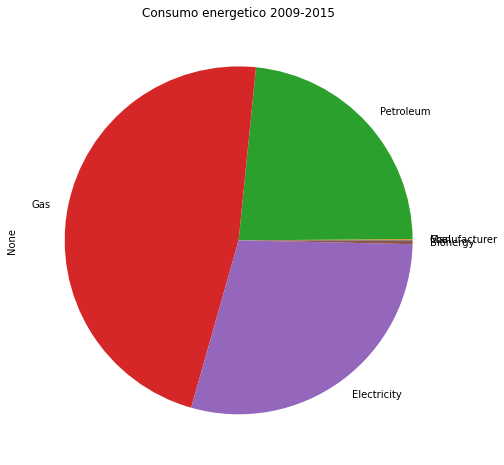

In [103]:
a4_dims = (8, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
consumo_total[consumo_total.columns[2:]].sum().plot.pie(ax=ax, title="Consumo energetico 2009-2015")

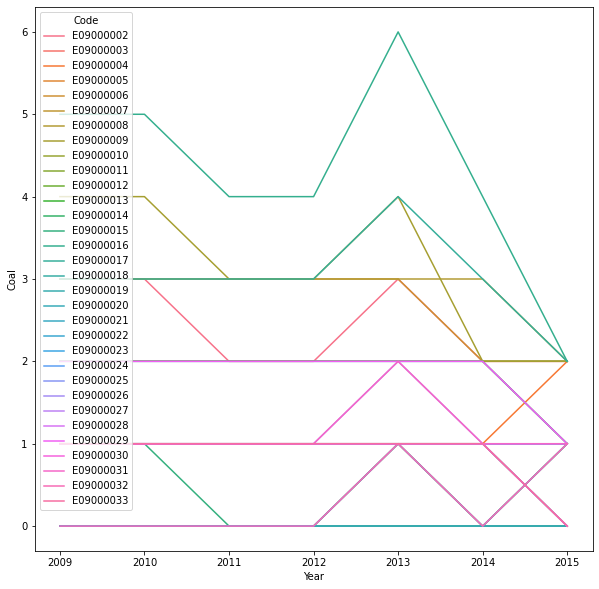

In [104]:
a4_dims = (10, 10)
consumo_total["Coal"]=consumo_total["Coal"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Coal", hue="Code",ax=ax)

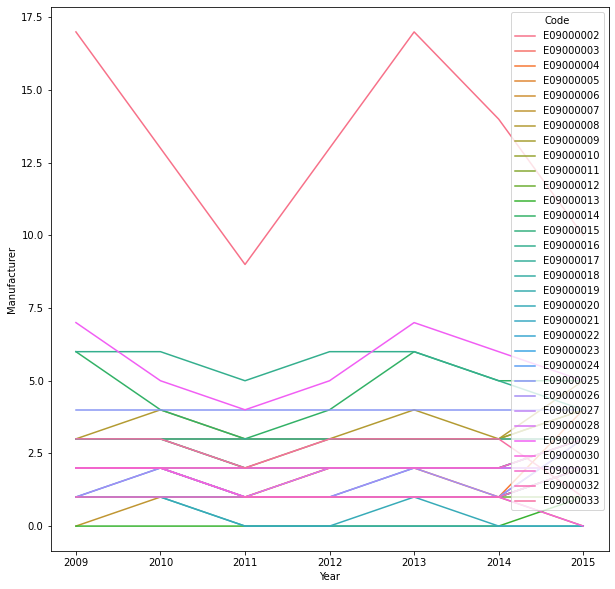

In [105]:
consumo_total["Manufacturer"]=consumo_total["Manufacturer"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Manufacturer", hue="Code",ax=ax)

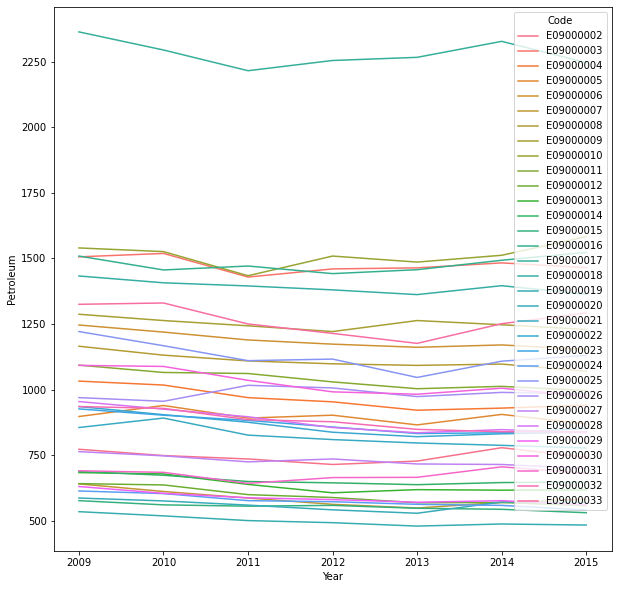

In [106]:
consumo_total["Petroleum"]=consumo_total["Petroleum"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Petroleum", hue="Code",ax=ax)

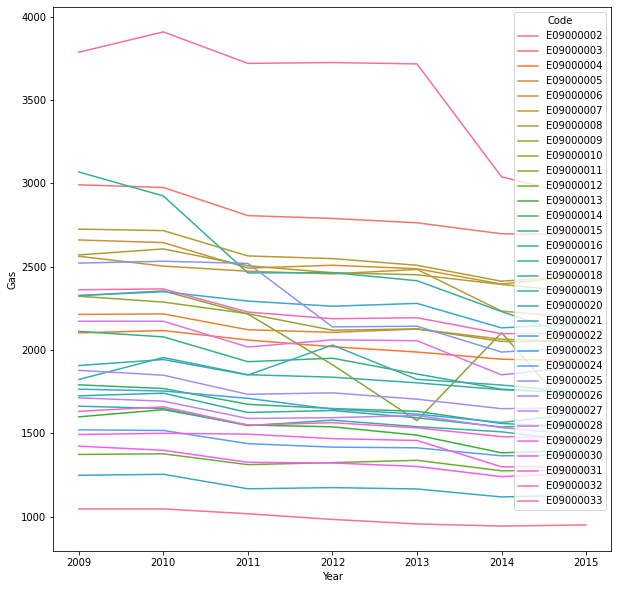

In [107]:
consumo_total["Gas"]=consumo_total["Gas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Gas", hue="Code",ax=ax)

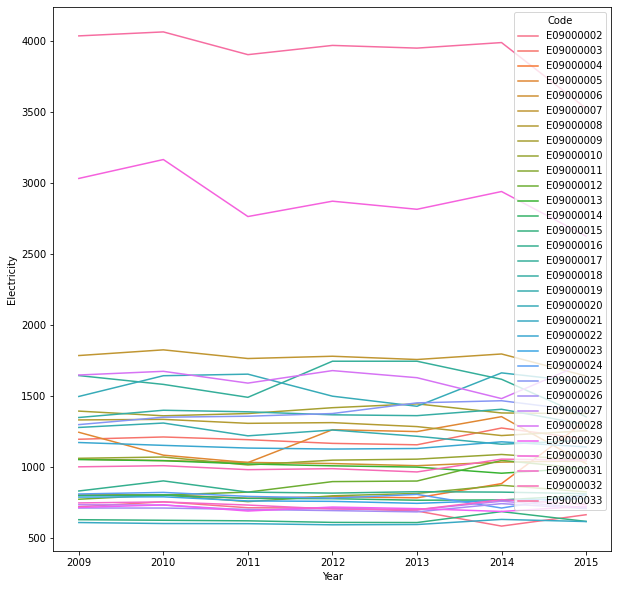

In [108]:
consumo_total["Electricity"]=consumo_total["Electricity"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Electricity", hue="Code",ax=ax)

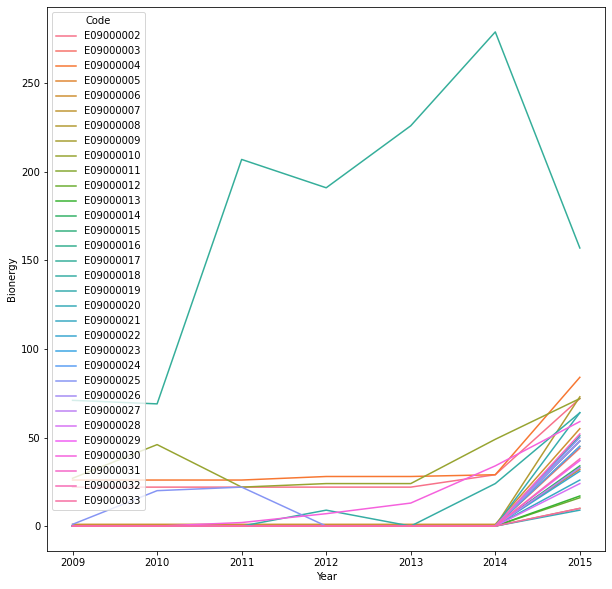

In [109]:
consumo_total["Bionergy"]=consumo_total["Bionergy"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Bionergy", hue="Code",ax=ax)

##DATASET FESTIVOS

In [110]:
festivos = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/Bank-holidays.xlsx')
festivos.head()

Date           Holiday-Event
0 2009-01-01          New Year's Day
1 2009-04-09    Previous Good Friday
2 2009-04-10             Good Friday
3 2009-04-13           Easter Monday
4 2009-05-04  Early May bank holiday

###ANALISIS DE DATOS

In [111]:
descripcionDatosDataset(festivos)

Cantidad de filas: 82
Cantidad de columnas: 2
----------------------------------------------------------------------------------------------------
Columna: Date
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01T00:00:00.000000000' '2009-04-09T00:00:00.000000000'
 '2009-04-10T00:00:00.000000000' '2009-04-13T00:00:00.000000000'
 '2009-05-04T00:00:00.000000000' '2009-05-25T00:00:00.000000000'
 '2009-08-31T00:00:00.000000000' '2009-11-05T00:00:00.000000000'
 '2009-12-25T00:00:00.000000000' '2009-12-26T00:00:00.000000000']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Holiday-Event
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ["New Year's Day" 'Previous Good Friday' 'Good Friday' 'Easter Monday'
 'Early May bank holiday' 'Late May bank holiday' 'August Bank Holidays'
 'Guy Fawkes Day' 'Christmas Day' 'Boxing Day']

###LIMPIEZA

In [112]:
festivos["Date"]=festivos["Date"].astype("string")


In [113]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
festivos["Mes"]=festivos["Date"].map(lambda x: str(x)[5:-3])
festivos["Dia"]=festivos["Date"].map(lambda x: str(x)[8:])
festivos["Year"]=festivos["Date"].map(lambda x: str(x)[:4])
festivos.drop("Date", inplace=True, axis=1)
festivos["Year"]

0     2009
1     2009
2     2009
3     2009
4     2009
      ... 
77    2015
78    2015
79    2015
80    2015
81    2015
Name: Year, Length: 82, dtype: object

In [114]:
festivos["Dia"]=festivos["Dia"].astype(int)
festivos["Mes"]=festivos["Mes"].astype(int)
festivos["Year"]=festivos["Year"].astype(int)


In [115]:
festivos["Festivo"]=True

In [116]:
festivos.drop("Holiday-Event", inplace=True, axis=1)

In [117]:
festivos

Mes  Dia  Year  Festivo
0     1    1  2009     True
1     4    9  2009     True
2     4   10  2009     True
3     4   13  2009     True
4     5    4  2009     True
..  ...  ...   ...      ...
77   11    5  2015     True
78   12   24  2015     True
79   12   25  2015     True
80   12   26  2015     True
81   12   28  2015     True

[82 rows x 4 columns]

#DATASET UNIDO

Unimos todos los dataset, usaremos el codigo del barrio como referencia y el anyo

###UNION DATASETS

In [182]:
llamadas.shape


(540444, 14)

In [183]:
dfs = [llamadas, viviendas_tr]
df = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)
df

IncGeo_WardNameNew  Year Postcode_full  ... Mes Dia Ingreso_Vivienda
0                        Abbey  2009      IG11 8JG  ...   1   1                5
1                       Alibon  2009          None  ...   1   1                5
2                    Becontree  2009       RM8 2UL  ...   1   1                5
3                    Gascoigne  2009      IG11 7BA  ...   1   1                5
4                        Heath  2009      RM10 7PT  ...   1   1                5
...                        ...   ...           ...  ...  ..  ..              ...
540439                  HACTON  2015          None  ...  12  30                8
540440  RAINHAM AND WENNINGTON  2015      RM13 9BU  ...  12  30                8
540441            ROMFORD TOWN  2015       RM1 1UP  ...  12  30                8
540442            ST. ANDREW'S  2015          None  ...  12  30                8
540443  RAINHAM AND WENNINGTON  2015          None  ...  12  31                8

[540444 rows x 15 columns]

In [184]:
#Unimos los dataset por el codigo y el anyo
df = pd.merge(df, densidad, how="outer")
df

IncGeo_WardNameNew  Year  ... Poblacion Area_m2
0                        Abbey  2009  ...    177580      36
1                       Alibon  2009  ...    177580      36
2                    Becontree  2009  ...    177580      36
3                    Gascoigne  2009  ...    177580      36
4                        Heath  2009  ...    177580      36
...                        ...   ...  ...       ...     ...
540439                  HACTON  2015  ...    249439     112
540440  RAINHAM AND WENNINGTON  2015  ...    249439     112
540441            ROMFORD TOWN  2015  ...    249439     112
540442            ST. ANDREW'S  2015  ...    249439     112
540443  RAINHAM AND WENNINGTON  2015  ...    249439     112

[540444 rows x 17 columns]

In [185]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,crimenes_total, how="outer")
df

IncGeo_WardNameNew  Year  ... Crim_Drogas Crim_Otros
0                        Abbey  2009  ...        1133        352
1                       Alibon  2009  ...        1133        352
2                    Becontree  2009  ...        1133        352
3                    Gascoigne  2009  ...        1133        352
4                        Heath  2009  ...        1133        352
...                        ...   ...  ...         ...        ...
540439                  HACTON  2015  ...         766        384
540440  RAINHAM AND WENNINGTON  2015  ...         766        384
540441            ROMFORD TOWN  2015  ...         766        384
540442            ST. ANDREW'S  2015  ...         766        384
540443  RAINHAM AND WENNINGTON  2015  ...         766        384

[540444 rows x 26 columns]

In [186]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,p_vivienda, how="outer")
df

IncGeo_WardNameNew  Year  ... Crim_Otros Precio_Vivienda
0                        Abbey  2009  ...        352          160000
1                       Alibon  2009  ...        352          160000
2                    Becontree  2009  ...        352          160000
3                    Gascoigne  2009  ...        352          160000
4                        Heath  2009  ...        352          160000
...                        ...   ...  ...        ...             ...
540439                  HACTON  2015  ...        384          287500
540440  RAINHAM AND WENNINGTON  2015  ...        384          287500
540441            ROMFORD TOWN  2015  ...        384          287500
540442            ST. ANDREW'S  2015  ...        384          287500
540443  RAINHAM AND WENNINGTON  2015  ...        384          287500

[540444 rows x 27 columns]

In [187]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,consumo_total, how="outer")
df

IncGeo_WardNameNew  Year Postcode_full  ...   Gas Electricity Bionergy
0                        Abbey  2009      IG11 8JG  ...  1046         722       22
1                       Alibon  2009          None  ...  1046         722       22
2                    Becontree  2009       RM8 2UL  ...  1046         722       22
3                    Gascoigne  2009      IG11 7BA  ...  1046         722       22
4                        Heath  2009      RM10 7PT  ...  1046         722       22
...                        ...   ...           ...  ...   ...         ...      ...
540439                  HACTON  2015          None  ...  1554         814       51
540440  RAINHAM AND WENNINGTON  2015      RM13 9BU  ...  1554         814       51
540441            ROMFORD TOWN  2015       RM1 1UP  ...  1554         814       51
540442            ST. ANDREW'S  2015          None  ...  1554         814       51
540443  RAINHAM AND WENNINGTON  2015          None  ...  1554         814       51

[540444 rows x 33 columns]

In [188]:
#Unimos los dataset de los festivos
df =  pd.merge(df,festivos, how="outer")
df

IncGeo_WardNameNew  Year  ... Bionergy Festivo
0                        Abbey  2009  ...       22    True
1                       Alibon  2009  ...       22    True
2                    Becontree  2009  ...       22    True
3                    Gascoigne  2009  ...       22    True
4                        Heath  2009  ...       22    True
...                        ...   ...  ...      ...     ...
540439           Wandle Valley  2015  ...       37     NaN
540440              Brooklands  2015  ...       51     NaN
540441                Gooshays  2015  ...       51     NaN
540442                 Pettits  2015  ...       51     NaN
540443  Rainham and Wennington  2015  ...       51     NaN

[540444 rows x 34 columns]

In [189]:
df=df[["Year", "Mes", "Dia","Festivo","IncGeo_WardNameNew","Code", "Postcode_full", "Postcode_district","ProperCase","IncGeo_WardCode","Easting_rounded", "Northing_rounded", "Ingreso_Vivienda", "Precio_Vivienda","Poblacion", "Area_m2", "Crim_Violencia", "Crim_Sexual", "Crim_Robos", "Crim_Robos_casas", "Crim_ladrones", "Crim_Fraude", "Crim_Danyo", "Crim_Drogas", "Crim_Otros",  "Coal", "Manufacturer", "Petroleum", "Gas", "Electricity", "Bionergy", "Num_Fire", "Num_Falsa_A", "Num_Service"]]

###ANALISIS DEL DATASET

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540444 entries, 0 to 540443
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IncGeo_WardNameNew  540444 non-null  object
 1   Year                540444 non-null  int64 
 2   Postcode_full       318379 non-null  object
 3   Postcode_district   540444 non-null  object
 4   Code                540444 non-null  object
 5   ProperCase          540444 non-null  object
 6   IncGeo_WardCode     540444 non-null  object
 7   Easting_rounded     540444 non-null  int64 
 8   Northing_rounded    540444 non-null  int64 
 9   Num_Fire            540444 non-null  int64 
 10  Num_Falsa_A         540444 non-null  int64 
 11  Num_Service         540444 non-null  int64 
 12  Mes                 540444 non-null  int64 
 13  Dia                 540444 non-null  int64 
 14  Ingreso_Vivienda    540444 non-null  int64 
 15  Poblacion           540444 non-null  int64 
 16  Ar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56b5914a10>,
      dtype=object)

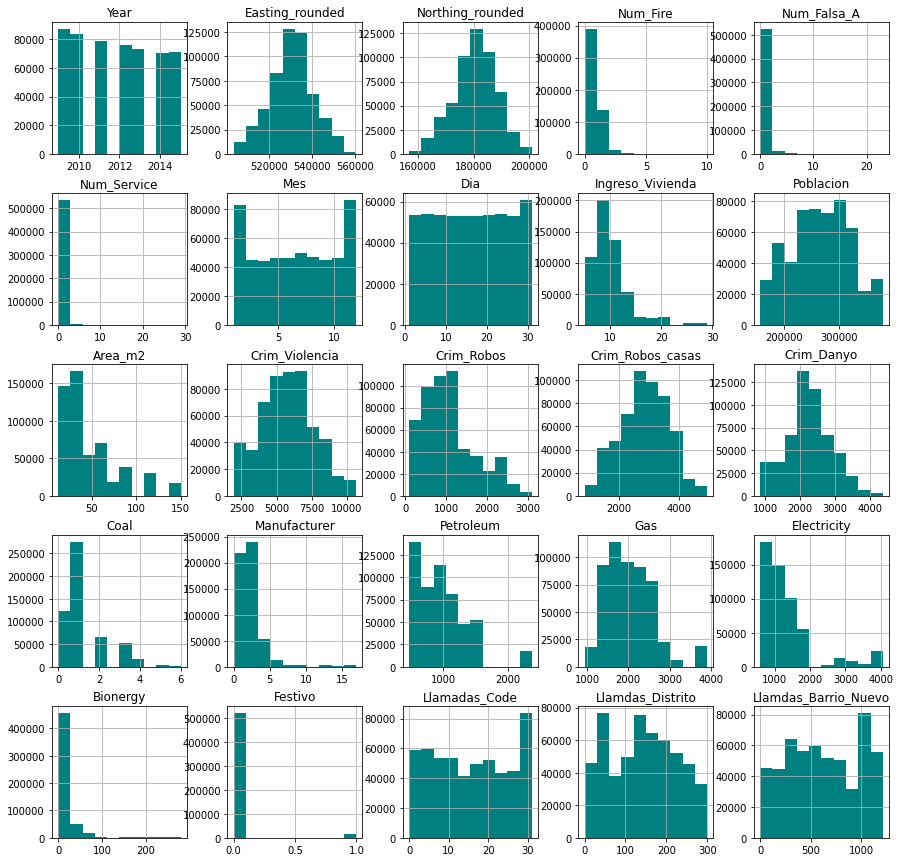

In [173]:
df.hist(figsize=(15,15), color="#008080")

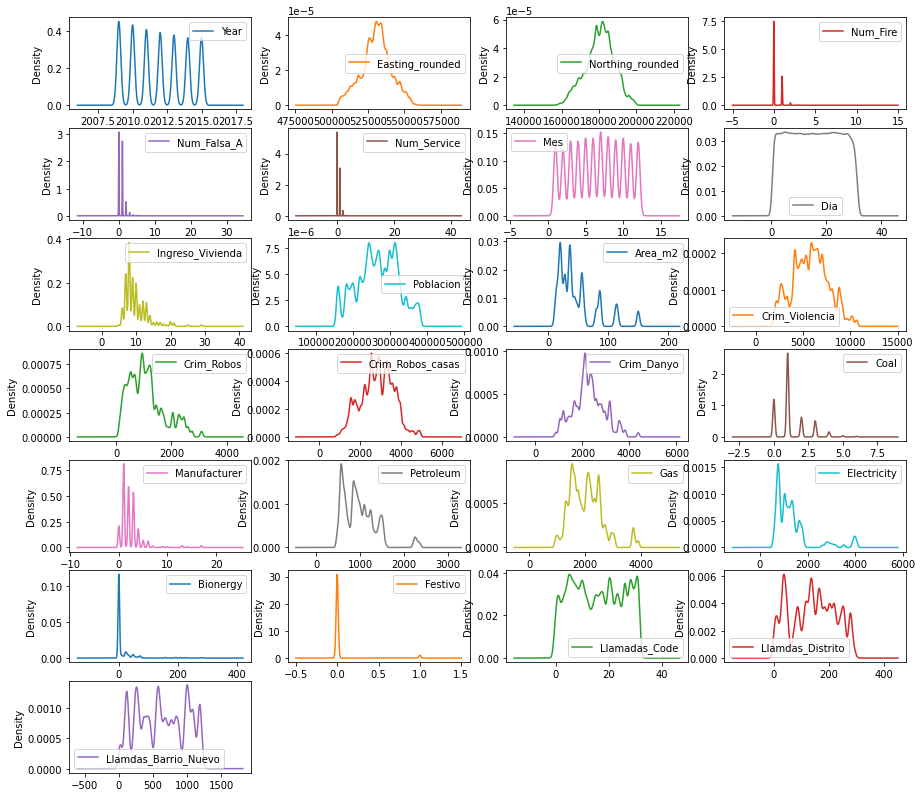

In [174]:
# Otra forma de representar la distrubicion tambien muy visual
df.plot(kind='density', subplots=True, layout=(10,4), sharex=False, figsize=(15,20))
plt.show()

In [190]:
df.describe()

Year            Mes  ...    Num_Falsa_A    Num_Service
count  540444.000000  540444.000000  ...  540444.000000  540444.000000
mean     2011.849067       6.551402  ...       0.687779       0.430394
std         2.009589       3.392028  ...       0.824288       0.610606
min      2009.000000       1.000000  ...       0.000000       0.000000
25%      2010.000000       4.000000  ...       0.000000       0.000000
50%      2012.000000       7.000000  ...       1.000000       0.000000
75%      2014.000000       9.000000  ...       1.000000       1.000000
max      2015.000000      12.000000  ...      23.000000      29.000000

[8 rows x 27 columns]

##VALORES PERDIDOS

In [191]:
# Buscamos valores perdidos
df.isna().sum()

Year                       0
Mes                        0
Dia                        0
Festivo               523247
IncGeo_WardNameNew         0
Code                       0
Postcode_full         222065
Postcode_district          0
ProperCase                 0
IncGeo_WardCode            0
Easting_rounded            0
Northing_rounded           0
Ingreso_Vivienda           0
Precio_Vivienda            0
Poblacion                  0
Area_m2                    0
Crim_Violencia             0
Crim_Sexual                0
Crim_Robos                 0
Crim_Robos_casas           0
Crim_ladrones              0
Crim_Fraude                0
Crim_Danyo                 0
Crim_Drogas                0
Crim_Otros                 0
Coal                       0
Manufacturer               0
Petroleum                  0
Gas                        0
Electricity                0
Bionergy                   0
Num_Fire                   0
Num_Falsa_A                0
Num_Service                0
dtype: int64

In [192]:
n=[]
for i in df["Festivo"]:
  if i != True:
    n.append(0)
  else:
    n.append(1) 

df["Festivo"]=n
df["Festivo"]

0         1
1         1
2         1
3         1
4         1
         ..
540439    0
540440    0
540441    0
540442    0
540443    0
Name: Festivo, Length: 540444, dtype: int64

In [193]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Year  Mes  Dia  Festivo  ... Bionergy Num_Fire Num_Falsa_A Num_Service
1       2009    1    1        1  ...       22        0           1           0
8       2009    1    1        1  ...        0        0           1           0
13      2009    1    1        1  ...        0        0           1           0
15      2009    1    1        1  ...        0        0           1           0
17      2009    1    1        1  ...        0        0           1           0
...      ...  ...  ...      ...  ...      ...      ...         ...         ...
540433  2015    3    1        0  ...       32        0           0           1
540435  2015    3    1        0  ...       37        0           1           0
540439  2015    3    1        0  ...       37        0           0           1
540440  2015    3    1        0  ...       51        0           1           0
540442  2015    3    1        0  ...       51        1           0           0

[222065 rows x 34 columns]

## VALORES CATEGORICOS

In [194]:
df["IncGeo_WardCode"].unique()  

array(['E05000026', 'E05000027', 'E05000028', 'E05000032', 'E05000034',
       'E05000039', 'E05000040', 'E05000041', 'E05000630', 'E05000631',
       'E05000632', 'E05000636', 'E05000638', 'E05000639', 'E05000641',
       'E05000643', 'E05000644', 'E05000645', 'E05000646', 'E05000647',
       'E05000649', 'E05000648', 'E05000250', 'E05000252', 'E05000253',
       'E05000254', 'E05000256', 'E05000258', 'E05000259', 'E05000260',
       'E05000495', 'E05000498', 'E05000499', 'E05000502', 'E05000504',
       'E05000506', 'E05000507', 'E05000510', 'E05000513', 'E05000515',
       'E05000266', 'E05000267', 'E05000268', 'E05000272', 'E05000275',
       'E05000276', 'E05000277', 'E05000280', 'E05000281', 'E05000516',
       'E05000517', 'E05000518', 'E05000522', 'E05000524', 'E05000529',
       'E05000531', 'E05000324', 'E05000325', 'E05000331', 'E05000332',
       'E05000335', 'E05000337', 'E05000366', 'E05000367', 'E05000368',
       'E05000370', 'E05000371', 'E05000375', 'E05000378', 'E050

In [195]:
labelencoder=LabelEncoder()
df["llamadas_IncGeo_WardCode"] = labelencoder.fit_transform(df["IncGeo_WardCode"])
df.drop("IncGeo_WardCode", inplace=True, axis=1)
df

Year  Mes  Dia  ...  Num_Falsa_A Num_Service llamadas_IncGeo_WardCode
0       2009    1    1  ...            0           0                        0
1       2009    1    1  ...            1           0                        1
2       2009    1    1  ...            0           0                        2
3       2009    1    1  ...            1           1                        6
4       2009    1    1  ...            0           0                        8
...      ...  ...  ...  ...          ...         ...                      ...
540439  2015    3    1  ...            0           1                      508
540440  2015    3    1  ...            1           0                      261
540441  2015    3    1  ...            1           0                      265
540442  2015    3    1  ...            0           0                      272
540443  2015    3    1  ...            1           0                      273

[540444 rows x 34 columns]

In [196]:
labelencoder=LabelEncoder()
df["Llamadas_Code"] = labelencoder.fit_transform(df["Code"])
df.drop("Code", inplace=True, axis=1)
df

Year  Mes  Dia  ...  Num_Service llamadas_IncGeo_WardCode Llamadas_Code
0       2009    1    1  ...            0                        0             0
1       2009    1    1  ...            0                        1             0
2       2009    1    1  ...            0                        2             0
3       2009    1    1  ...            1                        6             0
4       2009    1    1  ...            0                        8             0
...      ...  ...  ...  ...          ...                      ...           ...
540439  2015    3    1  ...            1                      508            27
540440  2015    3    1  ...            0                      261            14
540441  2015    3    1  ...            0                      265            14
540442  2015    3    1  ...            0                      272            14
540443  2015    3    1  ...            0                      273            14

[540444 rows x 34 columns]

In [197]:
labelencoder=LabelEncoder()
df["Llamdas_Distrito"] = labelencoder.fit_transform(df["Postcode_district"])
df.drop("Postcode_district", inplace=True, axis=1)
df

Year  Mes  ...  Llamadas_Code  Llamdas_Distrito
0       2009    1  ...              0                90
1       2009    1  ...              0               146
2       2009    1  ...              0               158
3       2009    1  ...              0                90
4       2009    1  ...              0               146
...      ...  ...  ...            ...               ...
540439  2015    3  ...             27               194
540440  2015    3  ...             14               157
540441  2015    3  ...             14               153
540442  2015    3  ...             14               145
540443  2015    3  ...             14               149

[540444 rows x 34 columns]

In [198]:
labelencoder=LabelEncoder()
df["Llamdas_Barrio_Nuevo"] = labelencoder.fit_transform(df["IncGeo_WardNameNew"])
df.drop("IncGeo_WardNameNew", inplace=True, axis=1)
df

Year  Mes  Dia  ...  Llamadas_Code Llamdas_Distrito Llamdas_Barrio_Nuevo
0       2009    1    1  ...              0               90                   14
1       2009    1    1  ...              0              146                   23
2       2009    1    1  ...              0              158                   93
3       2009    1    1  ...              0               90                  452
4       2009    1    1  ...              0              146                  570
...      ...  ...  ...  ...            ...              ...                  ...
540439  2015    3    1  ...             27              194                 1169
540440  2015    3    1  ...             14              157                  133
540441  2015    3    1  ...             14              153                  458
540442  2015    3    1  ...             14              145                  829
540443  2015    3    1  ...             14              149                  872

[540444 rows x 34 columns]

In [199]:
labelencoder=LabelEncoder()
df["Llamdas_Proper"] = labelencoder.fit_transform(df["ProperCase"])
df.drop("ProperCase", inplace=True, axis=1)
df

Year  Mes  Dia  ...  Llamdas_Distrito Llamdas_Barrio_Nuevo  Llamdas_Proper
0       2009    1    1  ...                90                   14               0
1       2009    1    1  ...               146                   23               0
2       2009    1    1  ...               158                   93               0
3       2009    1    1  ...                90                  452               0
4       2009    1    1  ...               146                  570               0
...      ...  ...  ...  ...               ...                  ...             ...
540439  2015    3    1  ...               194                 1169              27
540440  2015    3    1  ...               157                  133              14
540441  2015    3    1  ...               153                  458              14
540442  2015    3    1  ...               145                  829              14
540443  2015    3    1  ...               149                  872              14

[540444 rows x 34 columns]

##CORRELACIONES

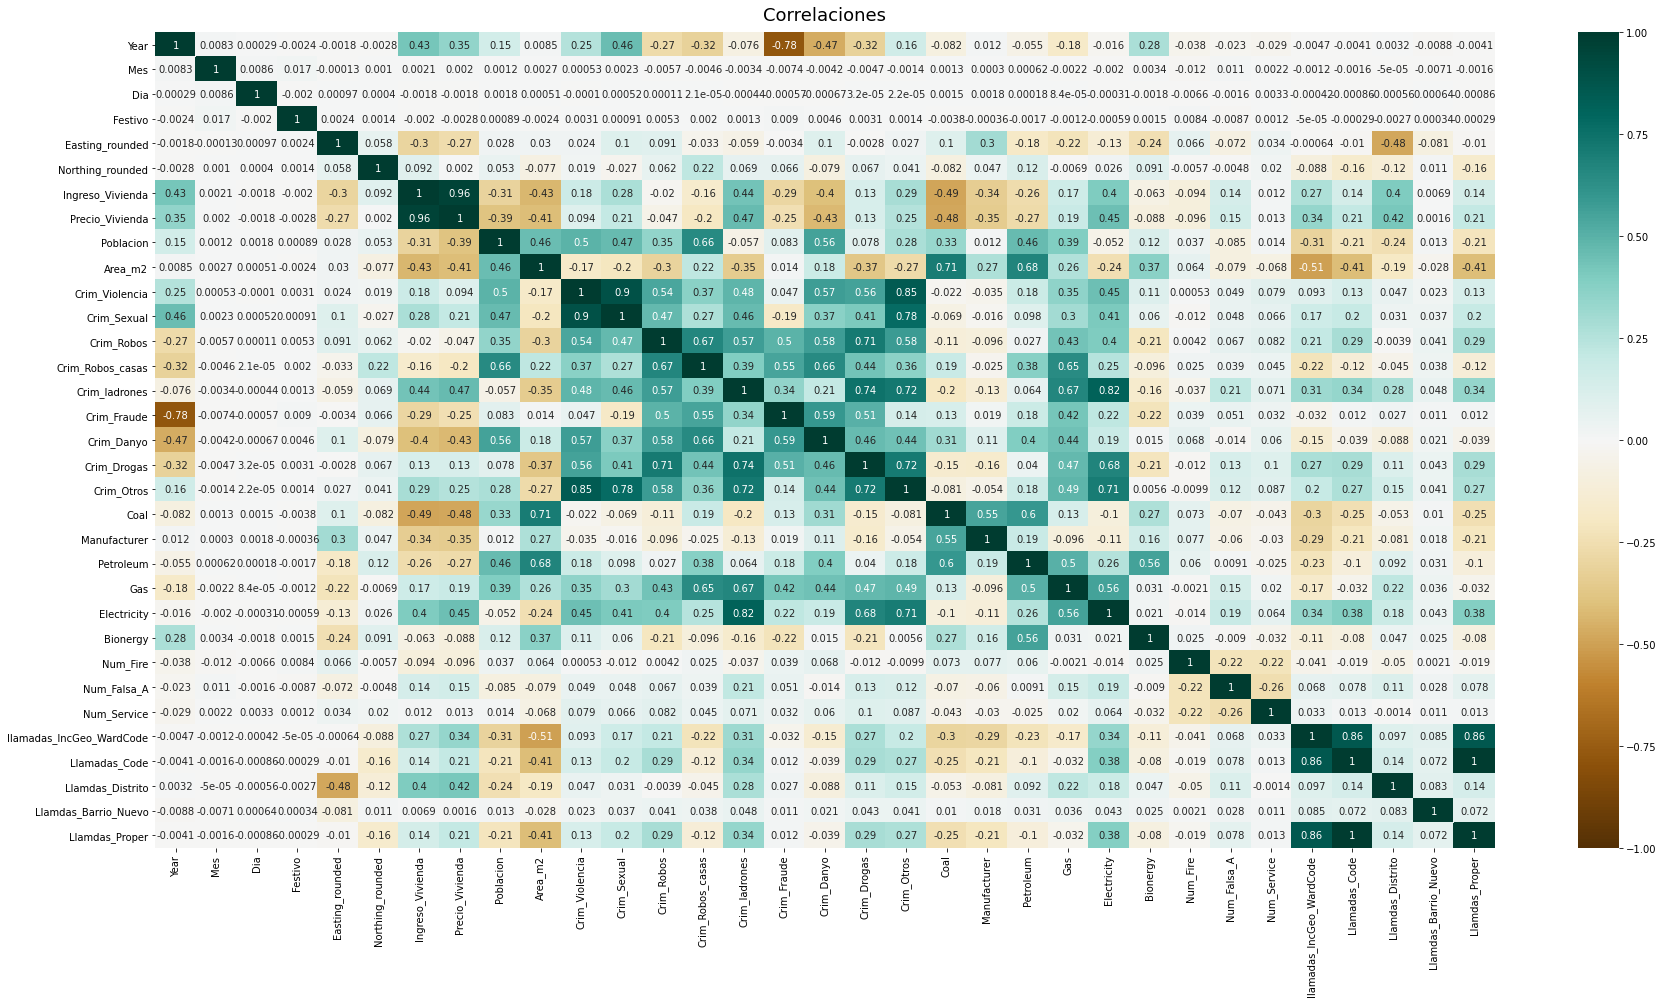

In [200]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

0.00-0.19: very weak

0.20-0.39: weak

0.40-0.59: moderate 

0.60-0.79: strong

0.80-1.00: very strong

In [201]:
#>0.75
df_correl=["Crim_Fraude", "Precio_Vivienda", "Crim_Sexual", "Crim_Otros", "Crim_Drogas", "Llamdas_Proper","Crim_ladrones","llamadas_IncGeo_WardCode"]
df.drop(df_correl, inplace=True, axis=1)

In [202]:
df

Year  Mes  Dia  ...  Llamadas_Code Llamdas_Distrito  Llamdas_Barrio_Nuevo
0       2009    1    1  ...              0               90                    14
1       2009    1    1  ...              0              146                    23
2       2009    1    1  ...              0              158                    93
3       2009    1    1  ...              0               90                   452
4       2009    1    1  ...              0              146                   570
...      ...  ...  ...  ...            ...              ...                   ...
540439  2015    3    1  ...             27              194                  1169
540440  2015    3    1  ...             14              157                   133
540441  2015    3    1  ...             14              153                   458
540442  2015    3    1  ...             14              145                   829
540443  2015    3    1  ...             14              149                   872

[540444 rows x 26 columns]

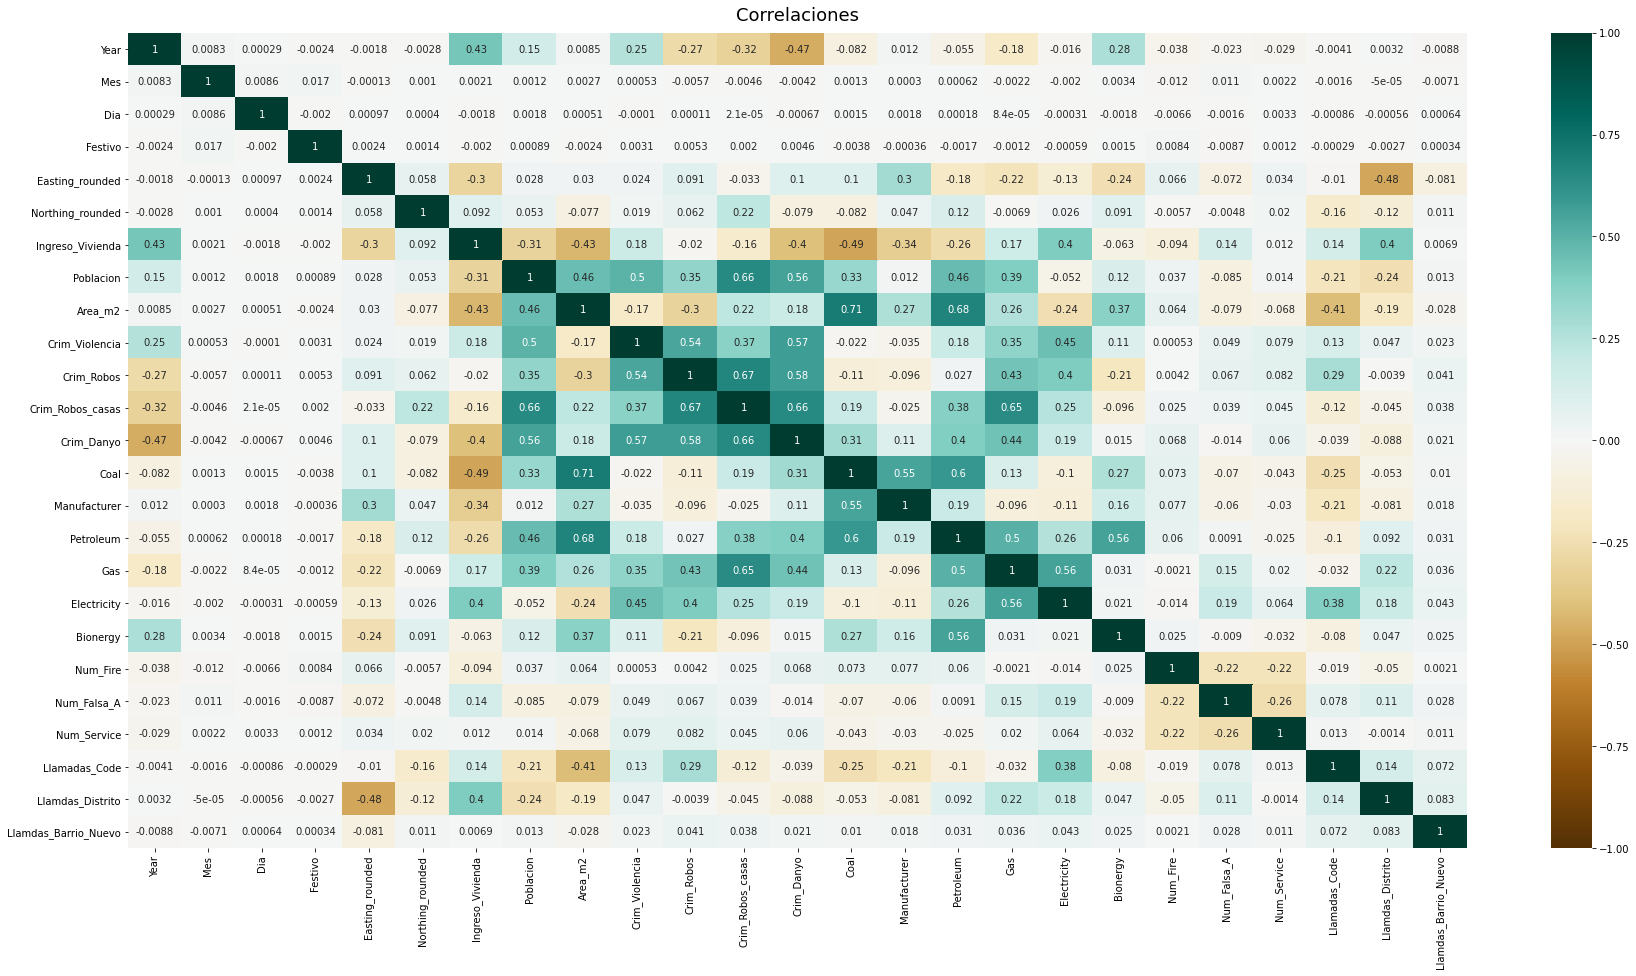

In [203]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540444 entries, 0 to 540443
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Year                  540444 non-null  int64 
 1   Mes                   540444 non-null  int64 
 2   Dia                   540444 non-null  int64 
 3   Festivo               540444 non-null  int64 
 4   Postcode_full         318379 non-null  object
 5   Easting_rounded       540444 non-null  int64 
 6   Northing_rounded      540444 non-null  int64 
 7   Ingreso_Vivienda      540444 non-null  int64 
 8   Poblacion             540444 non-null  int64 
 9   Area_m2               540444 non-null  int64 
 10  Crim_Violencia        540444 non-null  int64 
 11  Crim_Robos            540444 non-null  int64 
 12  Crim_Robos_casas      540444 non-null  int64 
 13  Crim_Danyo            540444 non-null  int64 
 14  Coal                  540444 non-null  int64 
 15  Manufacturer     

##OUTLIERS

In [140]:
#for column in df:
#  if column != "code":
#    plt.figure()
#    df.boxplot([column])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540444 entries, 0 to 540443
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Year                  540444 non-null  int64 
 1   Mes                   540444 non-null  int64 
 2   Dia                   540444 non-null  int64 
 3   Festivo               540444 non-null  int64 
 4   Postcode_full         318379 non-null  object
 5   Easting_rounded       540444 non-null  int64 
 6   Northing_rounded      540444 non-null  int64 
 7   Ingreso_Vivienda      540444 non-null  int64 
 8   Poblacion             540444 non-null  int64 
 9   Area_m2               540444 non-null  int64 
 10  Crim_Violencia        540444 non-null  int64 
 11  Crim_Robos            540444 non-null  int64 
 12  Crim_Robos_casas      540444 non-null  int64 
 13  Crim_Danyo            540444 non-null  int64 
 14  Coal                  540444 non-null  int64 
 15  Manufacturer     

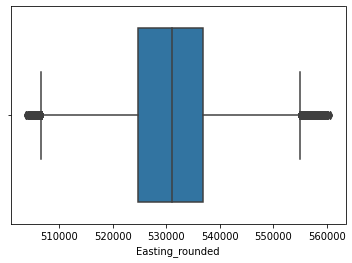

In [141]:
sns.boxplot(x=df["Easting_rounded"])


In [142]:
df.loc[(df["Easting_rounded"]>555000)].count()


Year                    1604
Postcode_full           1224
Easting_rounded         1604
Northing_rounded        1604
Num_Fire                1604
Num_Falsa_A             1604
Num_Service             1604
Mes                     1604
Dia                     1604
Ingreso_Vivienda        1604
Poblacion               1604
Area_m2                 1604
Crim_Violencia          1604
Crim_Robos              1604
Crim_Robos_casas        1604
Crim_Danyo              1604
Coal                    1604
Manufacturer            1604
Petroleum               1604
Gas                     1604
Electricity             1604
Bionergy                1604
Festivo                 1604
Llamadas_Code           1604
Llamdas_Distrito        1604
Llamdas_Barrio_Nuevo    1604
dtype: int64

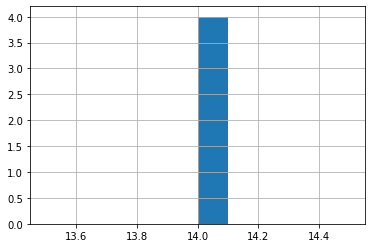

In [143]:
df.loc[(df["Easting_rounded"]>560000)]["Llamadas_Code"].hist()

In [144]:
df.loc[(df["Easting_rounded"]<510000)].count()

Year                    14702
Postcode_full           11078
Easting_rounded         14702
Northing_rounded        14702
Num_Fire                14702
Num_Falsa_A             14702
Num_Service             14702
Mes                     14702
Dia                     14702
Ingreso_Vivienda        14702
Poblacion               14702
Area_m2                 14702
Crim_Violencia          14702
Crim_Robos              14702
Crim_Robos_casas        14702
Crim_Danyo              14702
Coal                    14702
Manufacturer            14702
Petroleum               14702
Gas                     14702
Electricity             14702
Bionergy                14702
Festivo                 14702
Llamadas_Code           14702
Llamdas_Distrito        14702
Llamdas_Barrio_Nuevo    14702
dtype: int64

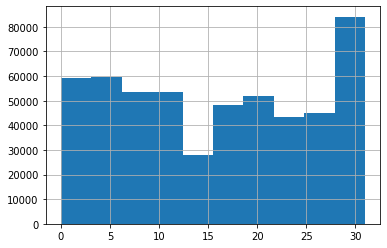

In [145]:
#df.loc[(df["Easting_rounded"]>510000)].groupby("Llamadas_Code").count()
df.loc[(df["Easting_rounded"]>510000)]["Llamadas_Code"].hist()

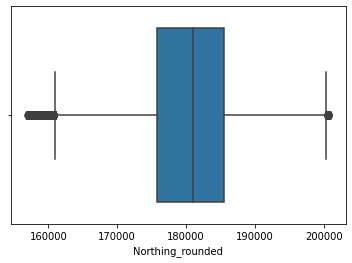

In [147]:
sns.boxplot(x=df["Northing_rounded"])

In [148]:
df.loc[(df["Northing_rounded"]<165000)].count()

Year                    16356
Postcode_full           10420
Easting_rounded         16356
Northing_rounded        16356
Num_Fire                16356
Num_Falsa_A             16356
Num_Service             16356
Mes                     16356
Dia                     16356
Ingreso_Vivienda        16356
Poblacion               16356
Area_m2                 16356
Crim_Violencia          16356
Crim_Robos              16356
Crim_Robos_casas        16356
Crim_Danyo              16356
Coal                    16356
Manufacturer            16356
Petroleum               16356
Gas                     16356
Electricity             16356
Bionergy                16356
Festivo                 16356
Llamadas_Code           16356
Llamdas_Distrito        16356
Llamdas_Barrio_Nuevo    16356
dtype: int64

In [149]:
df.loc[(df["Northing_rounded"]>195000)].count()

Year                    12170
Postcode_full            7683
Easting_rounded         12170
Northing_rounded        12170
Num_Fire                12170
Num_Falsa_A             12170
Num_Service             12170
Mes                     12170
Dia                     12170
Ingreso_Vivienda        12170
Poblacion               12170
Area_m2                 12170
Crim_Violencia          12170
Crim_Robos              12170
Crim_Robos_casas        12170
Crim_Danyo              12170
Coal                    12170
Manufacturer            12170
Petroleum               12170
Gas                     12170
Electricity             12170
Bionergy                12170
Festivo                 12170
Llamadas_Code           12170
Llamdas_Distrito        12170
Llamdas_Barrio_Nuevo    12170
dtype: int64

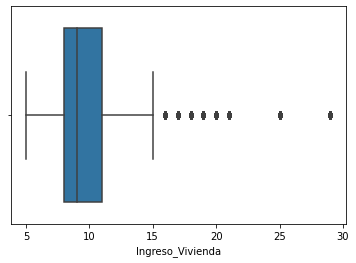

In [150]:
sns.boxplot(x=df["Ingreso_Vivienda"])

In [151]:
#df.loc[(df["Ingreso_Vivienda"]>17)].count()

Year                    22093
Postcode_full           11534
Easting_rounded         22093
Northing_rounded        22093
Num_Fire                22093
Num_Falsa_A             22093
Num_Service             22093
Mes                     22093
Dia                     22093
Ingreso_Vivienda        22093
Poblacion               22093
Area_m2                 22093
Crim_Violencia          22093
Crim_Robos              22093
Crim_Robos_casas        22093
Crim_Danyo              22093
Coal                    22093
Manufacturer            22093
Petroleum               22093
Gas                     22093
Electricity             22093
Bionergy                22093
Festivo                 22093
Llamadas_Code           22093
Llamdas_Distrito        22093
Llamdas_Barrio_Nuevo    22093
dtype: int64

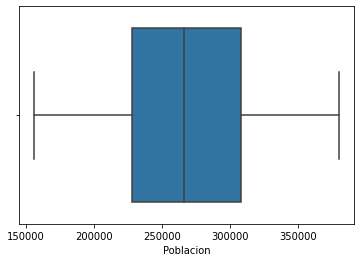

In [152]:
sns.boxplot(x=df["Poblacion"])

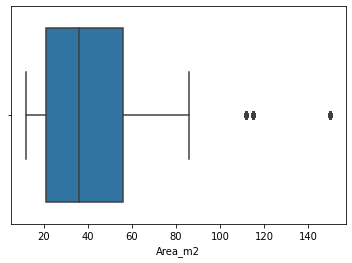

In [153]:
sns.boxplot(x=df["Area_m2"])

In [154]:
#df.loc[(df["Area_m2"]>90)].count()

Year                    46571
Postcode_full           32748
Easting_rounded         46571
Northing_rounded        46571
Num_Fire                46571
Num_Falsa_A             46571
Num_Service             46571
Mes                     46571
Dia                     46571
Ingreso_Vivienda        46571
Poblacion               46571
Area_m2                 46571
Crim_Violencia          46571
Crim_Robos              46571
Crim_Robos_casas        46571
Crim_Danyo              46571
Coal                    46571
Manufacturer            46571
Petroleum               46571
Gas                     46571
Electricity             46571
Bionergy                46571
Festivo                 46571
Llamadas_Code           46571
Llamdas_Distrito        46571
Llamdas_Barrio_Nuevo    46571
dtype: int64

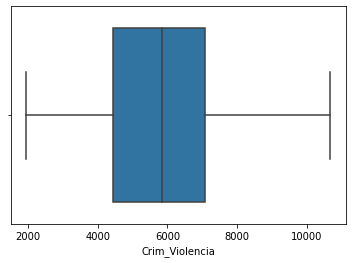

In [155]:
sns.boxplot(x=df["Crim_Violencia"])

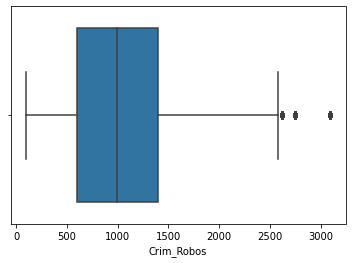

In [156]:
sns.boxplot(x=df["Crim_Robos"])

In [157]:
#df.loc[(df["Crim_Robos"]>2600)].count()

Year                    10553
Postcode_full            5737
Easting_rounded         10553
Northing_rounded        10553
Num_Fire                10553
Num_Falsa_A             10553
Num_Service             10553
Mes                     10553
Dia                     10553
Ingreso_Vivienda        10553
Poblacion               10553
Area_m2                 10553
Crim_Violencia          10553
Crim_Robos              10553
Crim_Robos_casas        10553
Crim_Danyo              10553
Coal                    10553
Manufacturer            10553
Petroleum               10553
Gas                     10553
Electricity             10553
Bionergy                10553
Festivo                 10553
Llamadas_Code           10553
Llamdas_Distrito        10553
Llamdas_Barrio_Nuevo    10553
dtype: int64

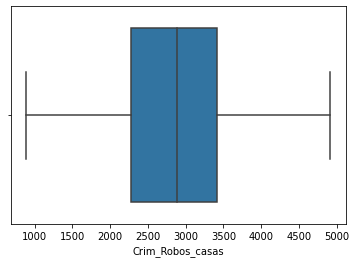

In [158]:
sns.boxplot(x=df["Crim_Robos_casas"])

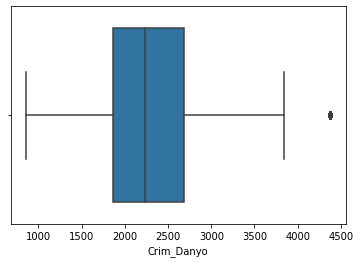

In [159]:
sns.boxplot(x=df["Crim_Danyo"])

In [ ]:
#df.loc[(df["Crim_Danyo"]>3800)].count()

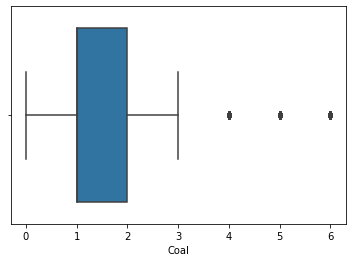

In [161]:
sns.boxplot(x=df["Coal"])

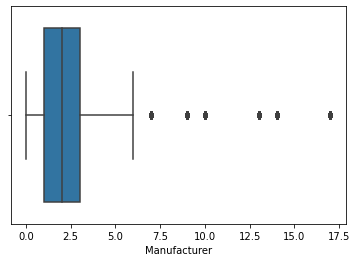

In [163]:
sns.boxplot(x=df["Manufacturer"])

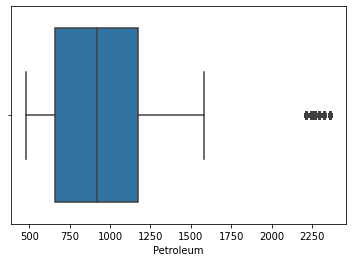

In [165]:
sns.boxplot(x=df["Petroleum"])

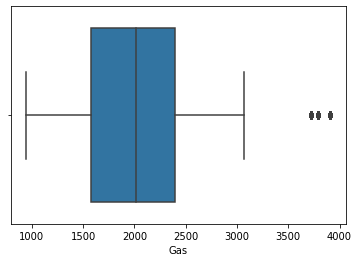

In [167]:
sns.boxplot(x=df["Gas"])

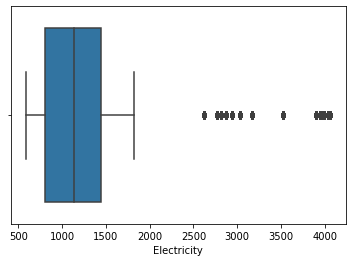

In [169]:
sns.boxplot(x=df["Electricity"])

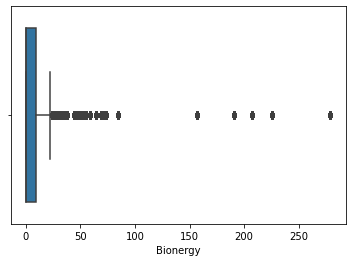

In [210]:
sns.boxplot(x=df["Bionergy"])

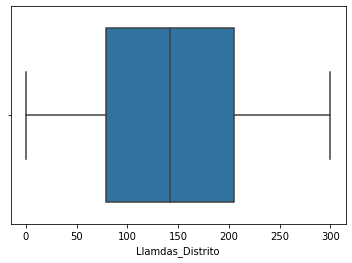

In [208]:
sns.boxplot(x=df["Llamdas_Distrito"])

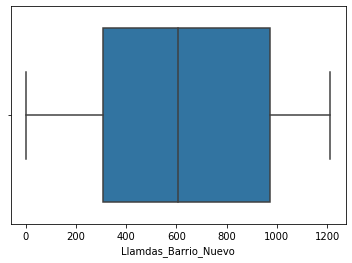

In [209]:
sns.boxplot(x=df["Llamdas_Barrio_Nuevo"])

In [212]:
def replace_outlier(val, mean, IRQ):
    if val < Q1 - 1.5*IRQ:
        return Q1 - 1.5*IRQ 
    elif val > Q2 + 1.5*IRQ:
        return Q2 + 1.5*IRQ
    return val

colum_outlier= df[["Easting_rounded","Northing_rounded","Ingreso_Vivienda","Area_m2","Crim_Robos","Crim_Danyo","Coal","Manufacturer","Petroleum","Gas","Electricity","Bionergy"]]

for col in colum_outlier:
   if col != "city":
    mean = df[col].mean()
    Q1=df[col].quantile(0.25)
    Q2=df[col].quantile(0.75)
    IRQ= Q2-Q1
    df[col] = df[col].map(lambda x: replace_outlier(x, mean, IRQ)) 

In [214]:
df

Year  Mes  Dia  ...  Llamadas_Code Llamdas_Distrito  Llamdas_Barrio_Nuevo
0       2009    1    1  ...              0               90                    14
1       2009    1    1  ...              0              146                    23
2       2009    1    1  ...              0              158                    93
3       2009    1    1  ...              0               90                   452
4       2009    1    1  ...              0              146                   570
...      ...  ...  ...  ...            ...              ...                   ...
540439  2015    3    1  ...             27              194                  1169
540440  2015    3    1  ...             14              157                   133
540441  2015    3    1  ...             14              153                   458
540442  2015    3    1  ...             14              145                   829
540443  2015    3    1  ...             14              149                   872

[540444 rows x 26 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

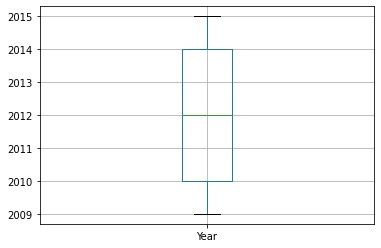

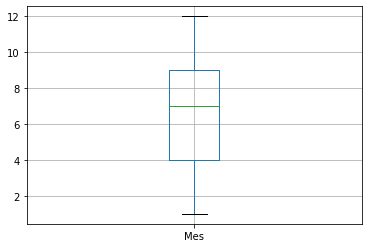

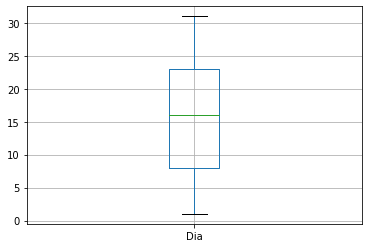

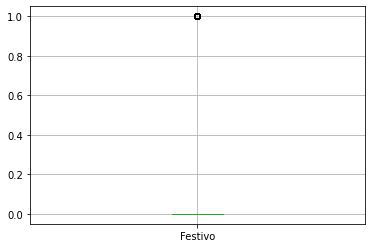

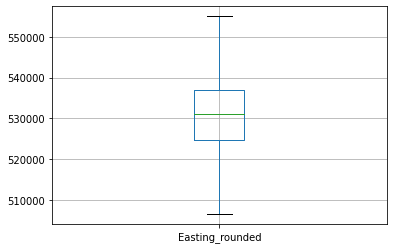

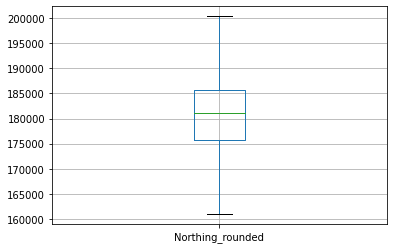

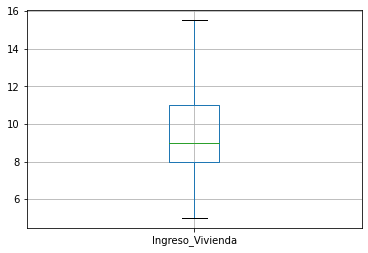

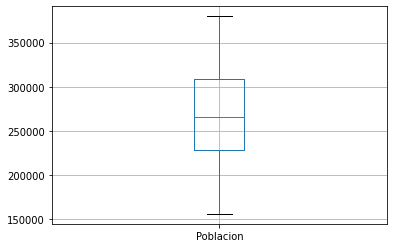

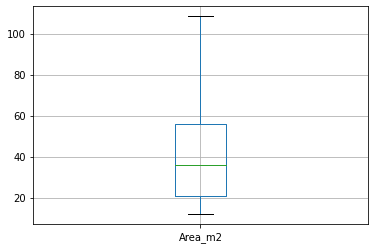

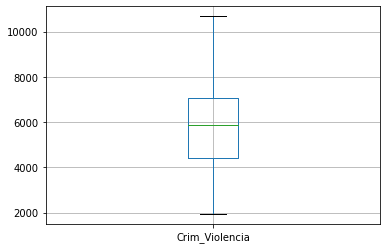

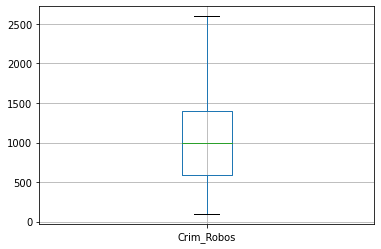

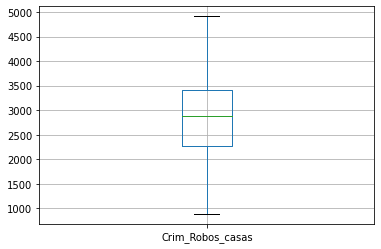

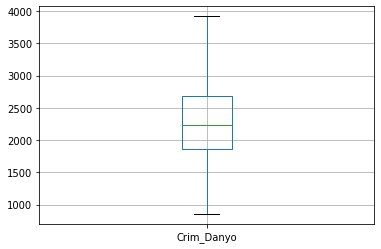

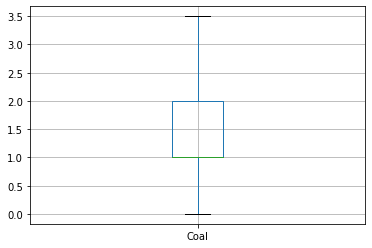

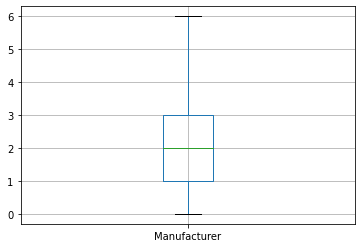

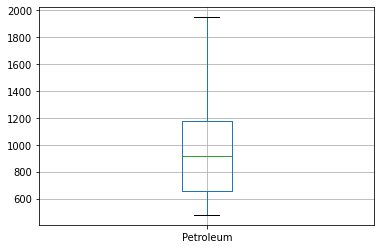

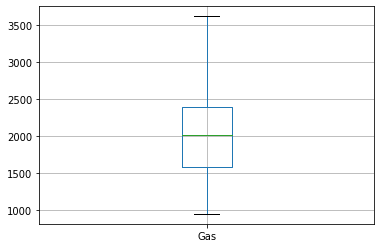

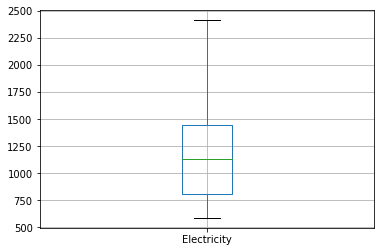

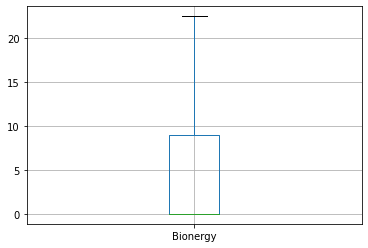

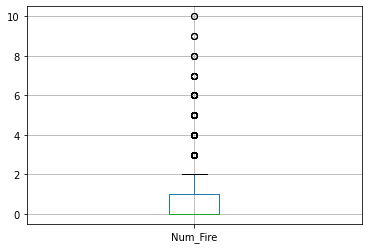

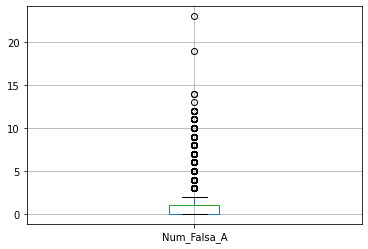

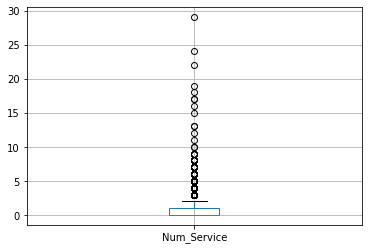

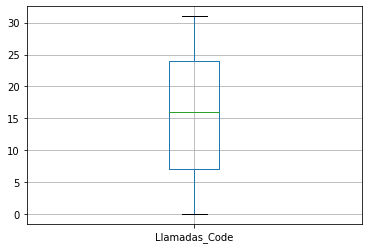

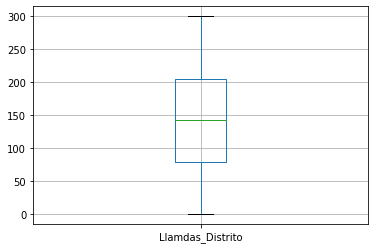

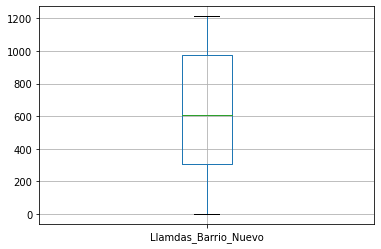

In [216]:
for column in df:
  if column != "Postcode_full":
    plt.figure()
    df.boxplot([column])

##TRANSFORMACION

#MINERIA DE DATOS

#ALGORITMOS MACHINE LEARNING

#OPTIMIZACION DE PARAMETROS

#RESULTADOS